In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy import stats
import nc_time_axis
from xclim import ensembles
import cmocean
import cartopy.crs as ccrs
from scipy.stats import ks_2samp

In [2]:
def process_sat(ds):
    ds = ds.drop_vars(["time_bnds", "gw"], errors="ignore").sortby('lat')   
    #ds = ds[['TREFHT']]
    ds['time'] = pd.date_range("2022-02-01", freq='1M', periods=ds.time.shape[0])
    ds['ens'] = np.arange(1,ds.ens.shape[0]+1)
    
    #ds = ds.rename({'tas': 'sat'})
    # Rename variable if it exists
    var_names = ["tas", "T2", "TREFHT", "ts", "TS"]
    for var in var_names:
        if var in ds.data_vars:
            ds = ds.rename({var: 'sat'})
            ds['sat'].attrs['units'] = 'K'
            break  # Exit the loop after renaming the first matching variable
    ds['sat'].attrs['units'] = 'K'

    return ds

def sst_anomaly(ds, var, nodiff = False):
    sst_clim = ds[var].groupby('time.month').mean('time')
    if nodiff:
        sst_anom = ds[var].groupby('time.month')-sst_clim
    else:
        sst_anom = ds[var].copy()
    return sst_anom, sst_clim

def plot_gm(ds, color, ax, label):
    m = ds.mean('ens')
    s = ds.std('ens')
    upper = m+s
    lower = m-s
    m.plot(ax = ax, color = color, lw = 3, label = label)
    upper.plot(ax = ax, color = color, lw = 1, ls = '--')
    lower.plot(ax = ax, color = color, lw = 1, ls = '--')

In [3]:
model = "MIROC-CHASER"
infile_path = Path(f"/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/{model}")
plt.rcParams.update({"font.size": 22})
xr.set_options(keep_attrs=True)
infile_path

PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER')

In [4]:
what = "tas_"
infiles_w = sorted(infile_path.glob(f"{what}*H2Oonly*.nc"))
infiles_w

[PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER/tas_Monthlymean_sfc_MIROC-CHASER_HTHHMOC-Exp1-H2Oonly-fixedSST.ensemble001.2022.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER/tas_Monthlymean_sfc_MIROC-CHASER_HTHHMOC-Exp1-H2Oonly-fixedSST.ensemble001.2023.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER/tas_Monthlymean_sfc_MIROC-CHASER_HTHHMOC-Exp1-H2Oonly-fixedSST.ensemble001.2024.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER/tas_Monthlymean_sfc_MIROC-CHASER_HTHHMOC-Exp1-H2Oonly-fixedSST.ensemble001.2025.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER/tas_Monthlymean_sfc_MIROC-CHASER_HTHHMOC-Exp1-H2Oonly-fixedSST.ensemble001.2026.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER/tas_Mo

In [5]:
what = "tas_"
infiles_e001 = sorted(infile_path.glob(f"{what}*H2Oonly*ensemble001*.nc"))
infiles_e001

[PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER/tas_Monthlymean_sfc_MIROC-CHASER_HTHHMOC-Exp1-H2Oonly-fixedSST.ensemble001.2022.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER/tas_Monthlymean_sfc_MIROC-CHASER_HTHHMOC-Exp1-H2Oonly-fixedSST.ensemble001.2023.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER/tas_Monthlymean_sfc_MIROC-CHASER_HTHHMOC-Exp1-H2Oonly-fixedSST.ensemble001.2024.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER/tas_Monthlymean_sfc_MIROC-CHASER_HTHHMOC-Exp1-H2Oonly-fixedSST.ensemble001.2025.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER/tas_Monthlymean_sfc_MIROC-CHASER_HTHHMOC-Exp1-H2Oonly-fixedSST.ensemble001.2026.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER/tas_Mo

In [6]:
what = "tas_"
infiles_e002 = sorted(infile_path.glob(f"{what}*H2Oonly*ensemble002*.nc"))

In [7]:
what = "tas_"
infiles_e003 = sorted(infile_path.glob(f"{what}*H2Oonly*ensemble003*.nc"))

In [8]:
what = "tas_"
infiles_e004 = sorted(infile_path.glob(f"{what}*H2Oonly*ensemble004*.nc"))

In [9]:
what = "tas_"
infiles_e005 = sorted(infile_path.glob(f"{what}*H2Oonly*ensemble005*.nc"))

In [10]:
what = "tas_"
infiles_e006 = sorted(infile_path.glob(f"{what}*H2Oonly*ensemble006*.nc"))

In [11]:
what = "tas_"
infiles_e007 = sorted(infile_path.glob(f"{what}*H2Oonly*ensemble007*.nc"))

In [12]:
what = "tas_"
infiles_e008 = sorted(infile_path.glob(f"{what}*H2Oonly*ensemble008*.nc"))

In [13]:
what = "tas_"
infiles_e009 = sorted(infile_path.glob(f"{what}*H2Oonly*ensemble009*.nc"))

In [14]:
what = "tas_"
infiles_e010 = sorted(infile_path.glob(f"{what}*H2Oonly*ensemble010*.nc"))

In [15]:
ens_001 = xr.open_mfdataset(
    infiles_e001[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)
ens_001

<xarray.Dataset> Size: 16MB
Dimensions:    (time: 120, lon: 256, bnds: 2, lat: 128)
Coordinates:
  * lon        (lon) float64 2kB 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * lat        (lat) float64 1kB 88.93 87.54 86.14 ... -86.14 -87.54 -88.93
  * time       (time) datetime64[ns] 960B 2022-01-16T12:00:00 ... 2031-12-16T...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (time, lon, bnds) float64 492kB dask.array<chunksize=(12, 256, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 246kB dask.array<chunksize=(12, 128, 2), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] 2kB dask.array<chunksize=(12, 2), meta=np.ndarray>
    T2         (time, lat, lon) float32 16MB dask.array<chunksize=(12, 128, 256), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          MIROC-CHASER HTHH-MOC EXPERIMENT DATA
    model_id:       MIROC-CHASER
    source:         AGCM of MIROC-CHASER (T85L81)
    institute_id:   MIROC
    instituion:     JAMSTEC (Japan Agency for Marine-Earth Science and Techno...
    contact:        Shingo Watanabe (wnabe@jamstec.go.jp)
    history:        Wed Aug 21 23:15:32 2024: ncrcat -4 /dev/shm/tmp.y0478.53...
    references:     MIROC-CHASER : Sekiya, T., K. Sudo, and T. Nagai (2016), ...
    experiment_id:  HTHH-MOC
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [16]:
ens_002 = xr.open_mfdataset(
    infiles_e002[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)
ens_002

<xarray.Dataset> Size: 16MB
Dimensions:    (time: 120, lon: 256, bnds: 2, lat: 128)
Coordinates:
  * lon        (lon) float64 2kB 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * lat        (lat) float64 1kB 88.93 87.54 86.14 ... -86.14 -87.54 -88.93
  * time       (time) datetime64[ns] 960B 2022-01-16T12:00:00 ... 2031-12-16T...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (time, lon, bnds) float64 492kB dask.array<chunksize=(12, 256, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 246kB dask.array<chunksize=(12, 128, 2), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] 2kB dask.array<chunksize=(12, 2), meta=np.ndarray>
    T2         (time, lat, lon) float32 16MB dask.array<chunksize=(12, 128, 256), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          MIROC-CHASER HTHH-MOC EXPERIMENT DATA
    model_id:       MIROC-CHASER
    source:         AGCM of MIROC-CHASER (T85L81)
    institute_id:   MIROC
    instituion:     JAMSTEC (Japan Agency for Marine-Earth Science and Techno...
    contact:        Shingo Watanabe (wnabe@jamstec.go.jp)
    history:        Thu Aug 22 00:20:17 2024: ncrcat -4 /dev/shm/tmp.y0478.10...
    references:     MIROC-CHASER : Sekiya, T., K. Sudo, and T. Nagai (2016), ...
    experiment_id:  HTHH-MOC
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [17]:
ens_003 = xr.open_mfdataset(
    infiles_e003[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)
ens_003

<xarray.Dataset> Size: 16MB
Dimensions:    (time: 120, lon: 256, bnds: 2, lat: 128)
Coordinates:
  * lon        (lon) float64 2kB 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * lat        (lat) float64 1kB 88.93 87.54 86.14 ... -86.14 -87.54 -88.93
  * time       (time) datetime64[ns] 960B 2022-01-16T12:00:00 ... 2031-12-16T...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (time, lon, bnds) float64 492kB dask.array<chunksize=(12, 256, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 246kB dask.array<chunksize=(12, 128, 2), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] 2kB dask.array<chunksize=(12, 2), meta=np.ndarray>
    T2         (time, lat, lon) float32 16MB dask.array<chunksize=(12, 128, 256), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          MIROC-CHASER HTHH-MOC EXPERIMENT DATA
    model_id:       MIROC-CHASER
    source:         AGCM of MIROC-CHASER (T85L81)
    institute_id:   MIROC
    instituion:     JAMSTEC (Japan Agency for Marine-Earth Science and Techno...
    contact:        Shingo Watanabe (wnabe@jamstec.go.jp)
    history:        Thu Aug 22 01:25:50 2024: ncrcat -4 /dev/shm/tmp.y0478.59...
    references:     MIROC-CHASER : Sekiya, T., K. Sudo, and T. Nagai (2016), ...
    experiment_id:  HTHH-MOC
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [18]:
ens_004 = xr.open_mfdataset(
    infiles_e004[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)
ens_004

<xarray.Dataset> Size: 16MB
Dimensions:    (time: 120, lon: 256, bnds: 2, lat: 128)
Coordinates:
  * lon        (lon) float64 2kB 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * lat        (lat) float64 1kB 88.93 87.54 86.14 ... -86.14 -87.54 -88.93
  * time       (time) datetime64[ns] 960B 2022-01-16T12:00:00 ... 2031-12-16T...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (time, lon, bnds) float64 492kB dask.array<chunksize=(12, 256, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 246kB dask.array<chunksize=(12, 128, 2), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] 2kB dask.array<chunksize=(12, 2), meta=np.ndarray>
    T2         (time, lat, lon) float32 16MB dask.array<chunksize=(12, 128, 256), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          MIROC-CHASER HTHH-MOC EXPERIMENT DATA
    model_id:       MIROC-CHASER
    source:         AGCM of MIROC-CHASER (T85L81)
    institute_id:   MIROC
    instituion:     JAMSTEC (Japan Agency for Marine-Earth Science and Techno...
    contact:        Shingo Watanabe (wnabe@jamstec.go.jp)
    history:        Thu Aug 22 01:50:56 2024: ncrcat -4 /dev/shm/tmp.y0478.55...
    references:     MIROC-CHASER : Sekiya, T., K. Sudo, and T. Nagai (2016), ...
    experiment_id:  HTHH-MOC
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [19]:
ens_005 = xr.open_mfdataset(
    infiles_e005[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)
ens_005

<xarray.Dataset> Size: 16MB
Dimensions:    (time: 120, lon: 256, bnds: 2, lat: 128)
Coordinates:
  * lon        (lon) float64 2kB 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * lat        (lat) float64 1kB 88.93 87.54 86.14 ... -86.14 -87.54 -88.93
  * time       (time) datetime64[ns] 960B 2022-01-16T12:00:00 ... 2031-12-16T...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (time, lon, bnds) float64 492kB dask.array<chunksize=(12, 256, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 246kB dask.array<chunksize=(12, 128, 2), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] 2kB dask.array<chunksize=(12, 2), meta=np.ndarray>
    T2         (time, lat, lon) float32 16MB dask.array<chunksize=(12, 128, 256), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          MIROC-CHASER HTHH-MOC EXPERIMENT DATA
    model_id:       MIROC-CHASER
    source:         AGCM of MIROC-CHASER (T85L81)
    institute_id:   MIROC
    instituion:     JAMSTEC (Japan Agency for Marine-Earth Science and Techno...
    contact:        Shingo Watanabe (wnabe@jamstec.go.jp)
    history:        Thu Aug 22 02:53:13 2024: ncrcat -4 /dev/shm/tmp.y0478.75...
    references:     MIROC-CHASER : Sekiya, T., K. Sudo, and T. Nagai (2016), ...
    experiment_id:  HTHH-MOC
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [20]:
ens_006 = xr.open_mfdataset(
    infiles_e006[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)
ens_006

<xarray.Dataset> Size: 16MB
Dimensions:    (time: 120, lon: 256, bnds: 2, lat: 128)
Coordinates:
  * lon        (lon) float64 2kB 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * lat        (lat) float64 1kB 88.93 87.54 86.14 ... -86.14 -87.54 -88.93
  * time       (time) datetime64[ns] 960B 2022-01-16T12:00:00 ... 2031-12-16T...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (time, lon, bnds) float64 492kB dask.array<chunksize=(12, 256, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 246kB dask.array<chunksize=(12, 128, 2), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] 2kB dask.array<chunksize=(12, 2), meta=np.ndarray>
    T2         (time, lat, lon) float32 16MB dask.array<chunksize=(12, 128, 256), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          MIROC-CHASER HTHH-MOC EXPERIMENT DATA
    model_id:       MIROC-CHASER
    source:         AGCM of MIROC-CHASER (T85L81)
    institute_id:   MIROC
    instituion:     JAMSTEC (Japan Agency for Marine-Earth Science and Techno...
    contact:        Shingo Watanabe (wnabe@jamstec.go.jp)
    history:        Thu Aug 22 03:49:09 2024: ncrcat -4 /dev/shm/tmp.y0478.16...
    references:     MIROC-CHASER : Sekiya, T., K. Sudo, and T. Nagai (2016), ...
    experiment_id:  HTHH-MOC
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [21]:
ens_007 = xr.open_mfdataset(
    infiles_e007[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)
ens_007

<xarray.Dataset> Size: 16MB
Dimensions:    (time: 120, lon: 256, bnds: 2, lat: 128)
Coordinates:
  * lon        (lon) float64 2kB 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * lat        (lat) float64 1kB 88.93 87.54 86.14 ... -86.14 -87.54 -88.93
  * time       (time) datetime64[ns] 960B 2022-01-16T12:00:00 ... 2031-12-16T...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (time, lon, bnds) float64 492kB dask.array<chunksize=(12, 256, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 246kB dask.array<chunksize=(12, 128, 2), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] 2kB dask.array<chunksize=(12, 2), meta=np.ndarray>
    T2         (time, lat, lon) float32 16MB dask.array<chunksize=(12, 128, 256), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          MIROC-CHASER HTHH-MOC EXPERIMENT DATA
    model_id:       MIROC-CHASER
    source:         AGCM of MIROC-CHASER (T85L81)
    institute_id:   MIROC
    instituion:     JAMSTEC (Japan Agency for Marine-Earth Science and Techno...
    contact:        Shingo Watanabe (wnabe@jamstec.go.jp)
    history:        Thu Aug 22 04:41:44 2024: ncrcat -4 /dev/shm/tmp.y0478.07...
    references:     MIROC-CHASER : Sekiya, T., K. Sudo, and T. Nagai (2016), ...
    experiment_id:  HTHH-MOC
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [22]:
ens_008 = xr.open_mfdataset(
    infiles_e008[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)
ens_008

<xarray.Dataset> Size: 16MB
Dimensions:    (time: 120, lon: 256, bnds: 2, lat: 128)
Coordinates:
  * lon        (lon) float64 2kB 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * lat        (lat) float64 1kB 88.93 87.54 86.14 ... -86.14 -87.54 -88.93
  * time       (time) datetime64[ns] 960B 2022-01-16T12:00:00 ... 2031-12-16T...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (time, lon, bnds) float64 492kB dask.array<chunksize=(12, 256, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 246kB dask.array<chunksize=(12, 128, 2), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] 2kB dask.array<chunksize=(12, 2), meta=np.ndarray>
    T2         (time, lat, lon) float32 16MB dask.array<chunksize=(12, 128, 256), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          MIROC-CHASER HTHH-MOC EXPERIMENT DATA
    model_id:       MIROC-CHASER
    source:         AGCM of MIROC-CHASER (T85L81)
    institute_id:   MIROC
    instituion:     JAMSTEC (Japan Agency for Marine-Earth Science and Techno...
    contact:        Shingo Watanabe (wnabe@jamstec.go.jp)
    history:        Thu Aug 22 05:51:22 2024: ncrcat -4 /dev/shm/tmp.y0478.16...
    references:     MIROC-CHASER : Sekiya, T., K. Sudo, and T. Nagai (2016), ...
    experiment_id:  HTHH-MOC
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [23]:
ens_009 = xr.open_mfdataset(
    infiles_e009[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)
ens_009

<xarray.Dataset> Size: 16MB
Dimensions:    (time: 120, lon: 256, bnds: 2, lat: 128)
Coordinates:
  * lon        (lon) float64 2kB 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * lat        (lat) float64 1kB 88.93 87.54 86.14 ... -86.14 -87.54 -88.93
  * time       (time) datetime64[ns] 960B 2022-01-16T12:00:00 ... 2031-12-16T...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (time, lon, bnds) float64 492kB dask.array<chunksize=(12, 256, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 246kB dask.array<chunksize=(12, 128, 2), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] 2kB dask.array<chunksize=(12, 2), meta=np.ndarray>
    T2         (time, lat, lon) float32 16MB dask.array<chunksize=(12, 128, 256), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          MIROC-CHASER HTHH-MOC EXPERIMENT DATA
    model_id:       MIROC-CHASER
    source:         AGCM of MIROC-CHASER (T85L81)
    institute_id:   MIROC
    instituion:     JAMSTEC (Japan Agency for Marine-Earth Science and Techno...
    contact:        Shingo Watanabe (wnabe@jamstec.go.jp)
    history:        Thu Aug 22 07:01:26 2024: ncrcat -4 /dev/shm/tmp.y0478.87...
    references:     MIROC-CHASER : Sekiya, T., K. Sudo, and T. Nagai (2016), ...
    experiment_id:  HTHH-MOC
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [24]:
ens_010 = xr.open_mfdataset(
    infiles_e010[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)
ens_010

<xarray.Dataset> Size: 16MB
Dimensions:    (time: 120, lon: 256, bnds: 2, lat: 128)
Coordinates:
  * lon        (lon) float64 2kB 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * lat        (lat) float64 1kB 88.93 87.54 86.14 ... -86.14 -87.54 -88.93
  * time       (time) datetime64[ns] 960B 2022-01-16T12:00:00 ... 2031-12-16T...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (time, lon, bnds) float64 492kB dask.array<chunksize=(12, 256, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 246kB dask.array<chunksize=(12, 128, 2), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] 2kB dask.array<chunksize=(12, 2), meta=np.ndarray>
    T2         (time, lat, lon) float32 16MB dask.array<chunksize=(12, 128, 256), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          MIROC-CHASER HTHH-MOC EXPERIMENT DATA
    model_id:       MIROC-CHASER
    source:         AGCM of MIROC-CHASER (T85L81)
    institute_id:   MIROC
    instituion:     JAMSTEC (Japan Agency for Marine-Earth Science and Techno...
    contact:        Shingo Watanabe (wnabe@jamstec.go.jp)
    history:        Thu Aug 22 08:11:14 2024: ncrcat -4 /dev/shm/tmp.y0478.73...
    references:     MIROC-CHASER : Sekiya, T., K. Sudo, and T. Nagai (2016), ...
    experiment_id:  HTHH-MOC
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [25]:
datasets = [ens_001, ens_002, ens_003, ens_004, ens_005, ens_006, ens_007, ens_008, ens_009, ens_010]

In [26]:
miroc_w = process_sat(xr.concat(datasets, dim = "ens"))
miroc_w

/tmp/ipykernel_211282/2720976601.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ds['time'] = pd.date_range("2022-02-01", freq='1M', periods=ds.time.shape[0])


<xarray.Dataset> Size: 165MB
Dimensions:   (ens: 10, time: 120, lon: 256, bnds: 2, lat: 128)
Coordinates:
  * lon       (lon) float64 2kB 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * lat       (lat) float64 1kB -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * time      (time) datetime64[ns] 960B 2022-02-28 2022-03-31 ... 2032-01-31
  * ens       (ens) int64 80B 1 2 3 4 5 6 7 8 9 10
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (ens, time, lon, bnds) float64 5MB dask.array<chunksize=(1, 12, 256, 2), meta=np.ndarray>
    lat_bnds  (ens, time, lat, bnds) float64 2MB dask.array<chunksize=(1, 12, 128, 2), meta=np.ndarray>
    sat       (ens, time, lat, lon) float32 157MB dask.array<chunksize=(1, 12, 128, 256), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          MIROC-CHASER HTHH-MOC EXPERIMENT DATA
    model_id:       MIROC-CHASER
    source:         AGCM of MIROC-CHASER (T85L81)
    institute_id:   MIROC
    instituion:     JAMSTEC (Japan Agency for Marine-Earth Science and Techno...
    contact:        Shingo Watanabe (wnabe@jamstec.go.jp)
    history:        Wed Aug 21 23:15:32 2024: ncrcat -4 /dev/shm/tmp.y0478.53...
    references:     MIROC-CHASER : Sekiya, T., K. Sudo, and T. Nagai (2016), ...
    experiment_id:  HTHH-MOC
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [27]:
what = "tas_"
in_e001 = sorted(infile_path.glob(f"{what}*NoVolc*ensemble001*.nc"))
in_e001

[PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER/tas_Monthlymean_sfc_MIROC-CHASER_HTHHMOC-Exp1-NoVolc-fixedSST.ensemble001.2022.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER/tas_Monthlymean_sfc_MIROC-CHASER_HTHHMOC-Exp1-NoVolc-fixedSST.ensemble001.2023.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER/tas_Monthlymean_sfc_MIROC-CHASER_HTHHMOC-Exp1-NoVolc-fixedSST.ensemble001.2024.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER/tas_Monthlymean_sfc_MIROC-CHASER_HTHHMOC-Exp1-NoVolc-fixedSST.ensemble001.2025.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER/tas_Monthlymean_sfc_MIROC-CHASER_HTHHMOC-Exp1-NoVolc-fixedSST.ensemble001.2026.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/MIROC-CHASER/tas_Monthly

In [28]:
what = "tas_"
in_e002 = sorted(infile_path.glob(f"{what}*NoVolc*ensemble002*.nc"))

In [29]:
what = "tas_"
in_e003 = sorted(infile_path.glob(f"{what}*NoVolc*ensemble003*.nc"))

In [30]:
what = "tas_"
in_e004 = sorted(infile_path.glob(f"{what}*NoVolc*ensemble004*.nc"))

In [31]:
what = "tas_"
in_e005 = sorted(infile_path.glob(f"{what}*NoVolc*ensemble005*.nc"))

In [32]:
what = "tas_"
in_e006 = sorted(infile_path.glob(f"{what}*NoVolc*ensemble006*.nc"))

In [33]:
what = "tas_"
in_e007 = sorted(infile_path.glob(f"{what}*NoVolc*ensemble007*.nc"))

In [34]:
what = "tas_"
in_e008 = sorted(infile_path.glob(f"{what}*NoVolc*ensemble008*.nc"))

In [35]:
what = "tas_"
in_e009 = sorted(infile_path.glob(f"{what}*NoVolc*ensemble009*.nc"))

In [36]:
what = "tas_"
in_e010 = sorted(infile_path.glob(f"{what}*NoVolc*ensemble010*.nc"))

In [37]:
ens_wo_001 = xr.open_mfdataset(
    in_e001[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)
ens_wo_001

<xarray.Dataset> Size: 16MB
Dimensions:    (time: 120, lon: 256, bnds: 2, lat: 128)
Coordinates:
  * lon        (lon) float64 2kB 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * lat        (lat) float64 1kB 88.93 87.54 86.14 ... -86.14 -87.54 -88.93
  * time       (time) datetime64[ns] 960B 2022-01-16T12:00:00 ... 2031-12-16T...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (time, lon, bnds) float64 492kB dask.array<chunksize=(12, 256, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 246kB dask.array<chunksize=(12, 128, 2), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] 2kB dask.array<chunksize=(12, 2), meta=np.ndarray>
    T2         (time, lat, lon) float32 16MB dask.array<chunksize=(12, 128, 256), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          MIROC-CHASER HTHH-MOC EXPERIMENT DATA
    model_id:       MIROC-CHASER
    source:         AGCM of MIROC-CHASER (T85L81)
    institute_id:   MIROC
    instituion:     JAMSTEC (Japan Agency for Marine-Earth Science and Techno...
    contact:        Shingo Watanabe (wnabe@jamstec.go.jp)
    history:        Wed Aug 21 00:45:17 2024: ncrcat -4 /dev/shm/tmp.y0478.44...
    references:     MIROC-CHASER : Sekiya, T., K. Sudo, and T. Nagai (2016), ...
    experiment_id:  HTHH-MOC
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [38]:
ens_wo_002 = xr.open_mfdataset(
    in_e002[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)
ens_wo_002

<xarray.Dataset> Size: 16MB
Dimensions:    (time: 120, lon: 256, bnds: 2, lat: 128)
Coordinates:
  * lon        (lon) float64 2kB 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * lat        (lat) float64 1kB 88.93 87.54 86.14 ... -86.14 -87.54 -88.93
  * time       (time) datetime64[ns] 960B 2022-01-16T12:00:00 ... 2031-12-16T...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (time, lon, bnds) float64 492kB dask.array<chunksize=(12, 256, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 246kB dask.array<chunksize=(12, 128, 2), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] 2kB dask.array<chunksize=(12, 2), meta=np.ndarray>
    T2         (time, lat, lon) float32 16MB dask.array<chunksize=(12, 128, 256), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          MIROC-CHASER HTHH-MOC EXPERIMENT DATA
    model_id:       MIROC-CHASER
    source:         AGCM of MIROC-CHASER (T85L81)
    institute_id:   MIROC
    instituion:     JAMSTEC (Japan Agency for Marine-Earth Science and Techno...
    contact:        Shingo Watanabe (wnabe@jamstec.go.jp)
    history:        Wed Aug 21 01:58:04 2024: ncrcat -4 /dev/shm/tmp.y0478.03...
    references:     MIROC-CHASER : Sekiya, T., K. Sudo, and T. Nagai (2016), ...
    experiment_id:  HTHH-MOC
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [39]:
ens_wo_003 = xr.open_mfdataset(
    in_e003[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)
ens_wo_003

<xarray.Dataset> Size: 16MB
Dimensions:    (time: 120, lon: 256, bnds: 2, lat: 128)
Coordinates:
  * lon        (lon) float64 2kB 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * lat        (lat) float64 1kB 88.93 87.54 86.14 ... -86.14 -87.54 -88.93
  * time       (time) datetime64[ns] 960B 2022-01-16T12:00:00 ... 2031-12-16T...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (time, lon, bnds) float64 492kB dask.array<chunksize=(12, 256, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 246kB dask.array<chunksize=(12, 128, 2), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] 2kB dask.array<chunksize=(12, 2), meta=np.ndarray>
    T2         (time, lat, lon) float32 16MB dask.array<chunksize=(12, 128, 256), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          MIROC-CHASER HTHH-MOC EXPERIMENT DATA
    model_id:       MIROC-CHASER
    source:         AGCM of MIROC-CHASER (T85L81)
    institute_id:   MIROC
    instituion:     JAMSTEC (Japan Agency for Marine-Earth Science and Techno...
    contact:        Shingo Watanabe (wnabe@jamstec.go.jp)
    history:        Wed Aug 21 03:11:52 2024: ncrcat -4 /dev/shm/tmp.y0478.53...
    references:     MIROC-CHASER : Sekiya, T., K. Sudo, and T. Nagai (2016), ...
    experiment_id:  HTHH-MOC
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [40]:
ens_wo_004 = xr.open_mfdataset(
    in_e004[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)
#ens_wo_004

In [41]:
ens_wo_005 = xr.open_mfdataset(
    in_e005[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)


In [42]:
ens_wo_006 = xr.open_mfdataset(
    in_e006[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)

In [43]:
ens_wo_007 = xr.open_mfdataset(
    in_e007[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)


In [44]:
ens_wo_008 = xr.open_mfdataset(
    in_e008[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)


In [45]:
ens_wo_009 = xr.open_mfdataset(
    in_e009[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)


In [46]:
ens_wo_010 = xr.open_mfdataset(
    in_e010[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim="time")#.pipe(process_sat)


In [47]:
datasets = [ens_wo_001, ens_wo_002, ens_wo_003, ens_wo_004, ens_wo_005, ens_wo_006, ens_wo_007, ens_wo_008, ens_wo_009, ens_wo_010]

In [48]:
miroc_wo = process_sat(xr.concat(datasets, dim = "ens"))
miroc_wo

/tmp/ipykernel_211282/2720976601.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ds['time'] = pd.date_range("2022-02-01", freq='1M', periods=ds.time.shape[0])


<xarray.Dataset> Size: 165MB
Dimensions:   (ens: 10, time: 120, lon: 256, bnds: 2, lat: 128)
Coordinates:
  * lon       (lon) float64 2kB 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * lat       (lat) float64 1kB -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * time      (time) datetime64[ns] 960B 2022-02-28 2022-03-31 ... 2032-01-31
  * ens       (ens) int64 80B 1 2 3 4 5 6 7 8 9 10
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (ens, time, lon, bnds) float64 5MB dask.array<chunksize=(1, 12, 256, 2), meta=np.ndarray>
    lat_bnds  (ens, time, lat, bnds) float64 2MB dask.array<chunksize=(1, 12, 128, 2), meta=np.ndarray>
    sat       (ens, time, lat, lon) float32 157MB dask.array<chunksize=(1, 12, 128, 256), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          MIROC-CHASER HTHH-MOC EXPERIMENT DATA
    model_id:       MIROC-CHASER
    source:         AGCM of MIROC-CHASER (T85L81)
    institute_id:   MIROC
    instituion:     JAMSTEC (Japan Agency for Marine-Earth Science and Techno...
    contact:        Shingo Watanabe (wnabe@jamstec.go.jp)
    history:        Wed Aug 21 00:45:17 2024: ncrcat -4 /dev/shm/tmp.y0478.44...
    references:     MIROC-CHASER : Sekiya, T., K. Sudo, and T. Nagai (2016), ...
    experiment_id:  HTHH-MOC
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [49]:
model = "CMAM"
infile_path = Path(f"/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/{model}")
plt.rcParams.update({"font.size": 22})
xr.set_options(keep_attrs=True)

In [50]:
what = "tas"
infiles_w = sorted(infile_path.glob(f"{what}*H2Oonly*.nc"))
infiles_wo = sorted(infile_path.glob(f"{what}*NoVolc*.nc"))

In [51]:
cmam_w = xr.open_mfdataset(
    infiles_w[:],
    parallel=False,
    combine="nested",
    concat_dim=["ens"]).pipe(process_sat)
cmam_w

/tmp/ipykernel_211282/2720976601.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ds['time'] = pd.date_range("2022-02-01", freq='1M', periods=ds.time.shape[0])


<xarray.Dataset> Size: 22MB
Dimensions:   (ens: 10, lat: 48, bnds: 2, lon: 96, time: 120)
Coordinates:
  * time      (time) datetime64[ns] 960B 2022-02-28 2022-03-31 ... 2032-01-31
  * lat       (lat) float64 384B -87.16 -83.48 -79.78 ... 79.78 83.48 87.16
  * lon       (lon) float64 768B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
  * ens       (ens) int64 80B 1 2 3 4 5 6 7 8 9 10
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (ens, lat, bnds) float64 8kB dask.array<chunksize=(1, 48, 2), meta=np.ndarray>
    lon_bnds  (ens, lon, bnds) float64 15kB dask.array<chunksize=(1, 96, 2), meta=np.ndarray>
    sat       (ens, time, lat, lon) float32 22MB dask.array<chunksize=(1, 1, 48, 96), meta=np.ndarray>
Attributes: (12/55)
    CCCma_model_hash:            Unknown
    CCCma_parent_runid:          dp980j
    CCCma_pycmor_hash:           1614c687d25a23dfb7a9a57540ee5aab277cc3fa
    CCCma_runid:                 dp981j
    Conventions:                 CF-1.7
    DISCLAIMER:                  PRELIMINARY DATA - NOT FOR PUBLICATION.
    ...                          ...
    tracking_id:                 4362be99-ba40-4e55-95ef-b4000b3fac26
    variable_id:                 tas
    variant_label:               r10i1p1f1
    version:                     v20240718
    license:                     HTHHMOC model data produced by The Governmen...
    cmor_version:                3.5.0

In [52]:
cmam_wo = xr.open_mfdataset(
    infiles_wo[:],
    parallel=False,
    combine="nested",
    concat_dim=["ens"]).pipe(process_sat)
cmam_wo

/tmp/ipykernel_211282/2720976601.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ds['time'] = pd.date_range("2022-02-01", freq='1M', periods=ds.time.shape[0])


<xarray.Dataset> Size: 20MB
Dimensions:   (ens: 9, lat: 48, bnds: 2, lon: 96, time: 120)
Coordinates:
  * time      (time) datetime64[ns] 960B 2022-02-28 2022-03-31 ... 2032-01-31
  * lat       (lat) float64 384B -87.16 -83.48 -79.78 ... 79.78 83.48 87.16
  * lon       (lon) float64 768B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
  * ens       (ens) int64 72B 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (ens, lat, bnds) float64 7kB dask.array<chunksize=(1, 48, 2), meta=np.ndarray>
    lon_bnds  (ens, lon, bnds) float64 14kB dask.array<chunksize=(1, 96, 2), meta=np.ndarray>
    sat       (ens, time, lat, lon) float32 20MB dask.array<chunksize=(1, 1, 48, 96), meta=np.ndarray>
Attributes: (12/55)
    CCCma_model_hash:            Unknown
    CCCma_parent_runid:          dp971p
    CCCma_pycmor_hash:           1614c687d25a23dfb7a9a57540ee5aab277cc3fa
    CCCma_runid:                 dp980j
    Conventions:                 CF-1.7
    DISCLAIMER:                  PRELIMINARY DATA - NOT FOR PUBLICATION.
    ...                          ...
    tracking_id:                 5e5d6d3f-a987-4acb-99dc-be157d6147a4
    variable_id:                 tas
    variant_label:               r10i1p1f1
    version:                     v20240718
    license:                     HTHHMOC model data produced by The Governmen...
    cmor_version:                3.5.0

In [53]:
model = "GSFC2D"
infile_path = Path(f"/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/{model}")
plt.rcParams.update({"font.size": 22})
xr.set_options(keep_attrs=True)

In [54]:
what = "ts"
infiles_w_H2O = sorted(infile_path.glob(f"{what}*H2O-*ensemble*.nc"))
infiles_wo = sorted(infile_path.glob(f"{what}*NoVolc*.nc"))

In [55]:
GSFC2D_w_H2O = xr.open_mfdataset(
    infiles_w_H2O[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim=["ens"]).pipe(process_sat)
GSFC2D_w_H2O

/tmp/ipykernel_211282/2720976601.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ds['time'] = pd.date_range("2022-02-01", freq='1M', periods=ds.time.shape[0])


<xarray.Dataset> Size: 217kB
Dimensions:  (ens: 10, time: 120, lat: 45)
Coordinates:
  * lat      (lat) float32 180B -88.0 -84.0 -80.0 -76.0 ... 76.0 80.0 84.0 88.0
  * time     (time) datetime64[ns] 960B 2022-02-28 2022-03-31 ... 2032-01-31
  * ens      (ens) int64 80B 1 2 3 4 5 6 7 8 9 10
Data variables:
    sat      (ens, time, lat) float32 216kB dask.array<chunksize=(1, 120, 45), meta=np.ndarray>
Attributes:
    project_id:          Experiments 1 and 4, H2O
    fields:              Monthly-mean 1-D atmosphere data (latitude, time:mon...
    institution:         NASA GSFC
    title:               GSFC 2D model output for APARC Hunga
    Missing_Data_Value:  1e+30
    Contact:             Eric Fleming, NASA/GSFC SSAI; EMAIL: eric.l.fleming@...

In [56]:
GSFC2D_wo = xr.open_mfdataset(
    infiles_wo[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim=["ens"]).pipe(process_sat)
GSFC2D_wo

/tmp/ipykernel_211282/2720976601.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ds['time'] = pd.date_range("2022-02-01", freq='1M', periods=ds.time.shape[0])


<xarray.Dataset> Size: 239kB
Dimensions:  (ens: 11, time: 120, lat: 45)
Coordinates:
  * lat      (lat) float32 180B -88.0 -84.0 -80.0 -76.0 ... 76.0 80.0 84.0 88.0
  * time     (time) datetime64[ns] 960B 2022-02-28 2022-03-31 ... 2032-01-31
  * ens      (ens) int64 88B 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    sat      (ens, time, lat) float32 238kB dask.array<chunksize=(1, 120, 45), meta=np.ndarray>
Attributes:
    project_id:          Experiments 1 and 4, No Volcano
    fields:              Monthly-mean 1-D atmosphere data (latitude, time:mon...
    institution:         NASA GSFC
    title:               GSFC 2D model output for APARC Hunga
    Missing_Data_Value:  1e+30
    Contact:             Eric Fleming, NASA/GSFC SSAI; EMAIL: eric.l.fleming@...

In [57]:
model = "waccm6mam"
infile_path = Path(f"/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/{model}")
plt.rcParams.update({"font.size": 22})
xr.set_options(keep_attrs=True)

In [58]:
what = "ts"
infiles_w = sorted(infile_path.glob(f"*SO2andH2O*{what}.nc"))
infiles_wo = sorted(infile_path.glob(f"*NoVolc*{what}.nc"))
infiles_wo

[PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/waccm6mam/Monthlymean_WACCM6MAM_HTHHMOC-Exp1and4-NoVolc-fixedSST-ensemble001.ts.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/waccm6mam/Monthlymean_WACCM6MAM_HTHHMOC-Exp1and4-NoVolc-fixedSST-ensemble002.ts.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/waccm6mam/Monthlymean_WACCM6MAM_HTHHMOC-Exp1and4-NoVolc-fixedSST-ensemble003.ts.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/waccm6mam/Monthlymean_WACCM6MAM_HTHHMOC-Exp1and4-NoVolc-fixedSST-ensemble004.ts.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/waccm6mam/Monthlymean_WACCM6MAM_HTHHMOC-Exp1and4-NoVolc-fixedSST-ensemble005.ts.nc'),
 PosixPath('/sto0/data/Intermediate/Hunga_Tonga_byAles/htmip/htmip/Exp1_fixedSST/waccm6mam/Monthlymean_WACCM6MAM_HTHHMOC-Exp1and4-NoVolc-fixedSST-ensemble006.ts.nc')

In [59]:
waccm_w = xr.open_mfdataset(
    infiles_w[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim=["ens"]).pipe(process_sat)
waccm_w

/tmp/ipykernel_211282/2720976601.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ds['time'] = pd.date_range("2022-02-01", freq='1M', periods=ds.time.shape[0])


<xarray.Dataset> Size: 531MB
Dimensions:  (ens: 20, time: 120, lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) datetime64[ns] 960B 2022-02-28 2022-03-31 ... 2032-01-31
  * ens      (ens) int64 160B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Data variables:
    sat      (ens, time, lat, lon) float32 531MB dask.array<chunksize=(1, 120, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              f.e22.cesm2.2.2.FWHIST.f09_g17.honga_tonga.2022_2031.S...
    logname:           xinyuew
    host:              derecho4
    initial_file:      b.e22.cesm2.2.2.BWHIST.f09_g17.honga_tonga.spinup_jan2...
    topography_file:   /glade/campaign/cesm/cesmdata/inputdata/atm/cam/topo/f...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Wed Nov 27 13:15:13 2024: ncrcat -O -d time,0,119 -v T...
    NCO:               netCDF Operators version 5.1.9 (Homepage = http://nco....

In [60]:
waccm_wo = xr.open_mfdataset(
    infiles_wo[:],
    parallel=False,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim=["ens"]).pipe(process_sat)
waccm_wo

/tmp/ipykernel_211282/2720976601.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ds['time'] = pd.date_range("2022-02-01", freq='1M', periods=ds.time.shape[0])


<xarray.Dataset> Size: 531MB
Dimensions:  (ens: 20, time: 120, lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) datetime64[ns] 960B 2022-02-28 2022-03-31 ... 2032-01-31
  * ens      (ens) int64 160B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Data variables:
    sat      (ens, time, lat, lon) float32 531MB dask.array<chunksize=(1, 120, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              f.e22.cesm2.2.2.FWHIST.f09_g17.honga_tonga.2022_2031.n...
    logname:           xinyuew
    host:              derecho7
    initial_file:      b.e22.cesm2.2.2.BWHIST.f09_g17.honga_tonga.spinup_jan2...
    topography_file:   /glade/campaign/cesm/cesmdata/inputdata/atm/cam/topo/f...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Wed Nov 27 13:15:26 2024: ncrcat -O -d time,0,119 -v T...
    NCO:               netCDF Operators version 5.1.9 (Homepage = http://nco....

In [61]:
#create annual mean for all models
miroc_w_sat_y = miroc_w["sat"].resample(time = "1YE").mean()
miroc_wo_sat_y = miroc_wo["sat"].resample(time = "1YE").mean()
cmam_w_sat_y = cmam_w["sat"].resample(time = "1YE").mean()
cmam_wo_sat_y = cmam_wo["sat"].resample(time = "1YE").mean()
GSFC2D_w_sat_y_zm = GSFC2D_w_H2O["sat"].resample(time = "1YE").mean()
GSFC2D_wo_sat_y_zm = GSFC2D_wo["sat"].resample(time = "1YE").mean()
waccm_w_sat_y = waccm_w["sat"].resample(time = "1YE").mean()
waccm_wo_sat_y = waccm_wo["sat"].resample(time = "1YE").mean()

In [62]:
#selecting time between 2022-01 and 2031-12 for each dataset
sel_dict = dict(time = slice('2022-01','2031-12'))
miroc_w_sat_sel = miroc_w_sat_y.sel(**sel_dict)
miroc_wo_sat_sel = miroc_wo_sat_y.sel(**sel_dict)
waccm_w_sat_sel = waccm_w_sat_y.sel(**sel_dict)
waccm_wo_sat_sel = waccm_wo_sat_y.sel(**sel_dict)
cmam_w_sat_sel = cmam_w_sat_y.sel(**sel_dict)
cmam_wo_sat_sel = cmam_wo_sat_y.sel(**sel_dict)
GSFC2D_w_sat_sel = GSFC2D_w_sat_y_zm.sel(**sel_dict)
GSFC2D_wo_sat_sel = GSFC2D_wo_sat_y_zm.sel(**sel_dict)

# Calculate latitude weights and area weighted global mean
weights_miroc = np.cos(np.deg2rad(miroc_w_sat_sel.lat))
weights_cmam = np.cos(np.deg2rad(cmam_w_sat_sel.lat))
weights_waccm = np.cos(np.deg2rad(waccm_w_sat_sel.lat))
weights_miroc.name = "weights"
weights_cmam.name = "weights"
weights_waccm.name = "weights"

miroc_w_sat_sel_gm = miroc_w_sat_sel.weighted(weights_miroc).mean(['lat','lon']).load()
miroc_wo_sat_sel_gm = miroc_wo_sat_sel.weighted(weights_miroc).mean(['lat','lon']).load()
cmam_w_sat_sel_gm = cmam_w_sat_sel.weighted(weights_cmam).mean(['lat','lon']).load()
cmam_wo_sat_sel_gm = cmam_wo_sat_sel.weighted(weights_cmam).mean(['lat','lon']).load()
waccm_w_sat_sel_gm = waccm_w_sat_sel.weighted(weights_waccm).mean(['lat','lon']).load()
waccm_wo_sat_sel_gm = waccm_wo_sat_sel.weighted(weights_waccm).mean(['lat','lon']).load()
GSFC2D_w_sat_sel_gm = GSFC2D_w_sat_sel.mean("lat").load()
GSFC2D_wo_sat_sel_gm = GSFC2D_wo_sat_sel.mean("lat").load()

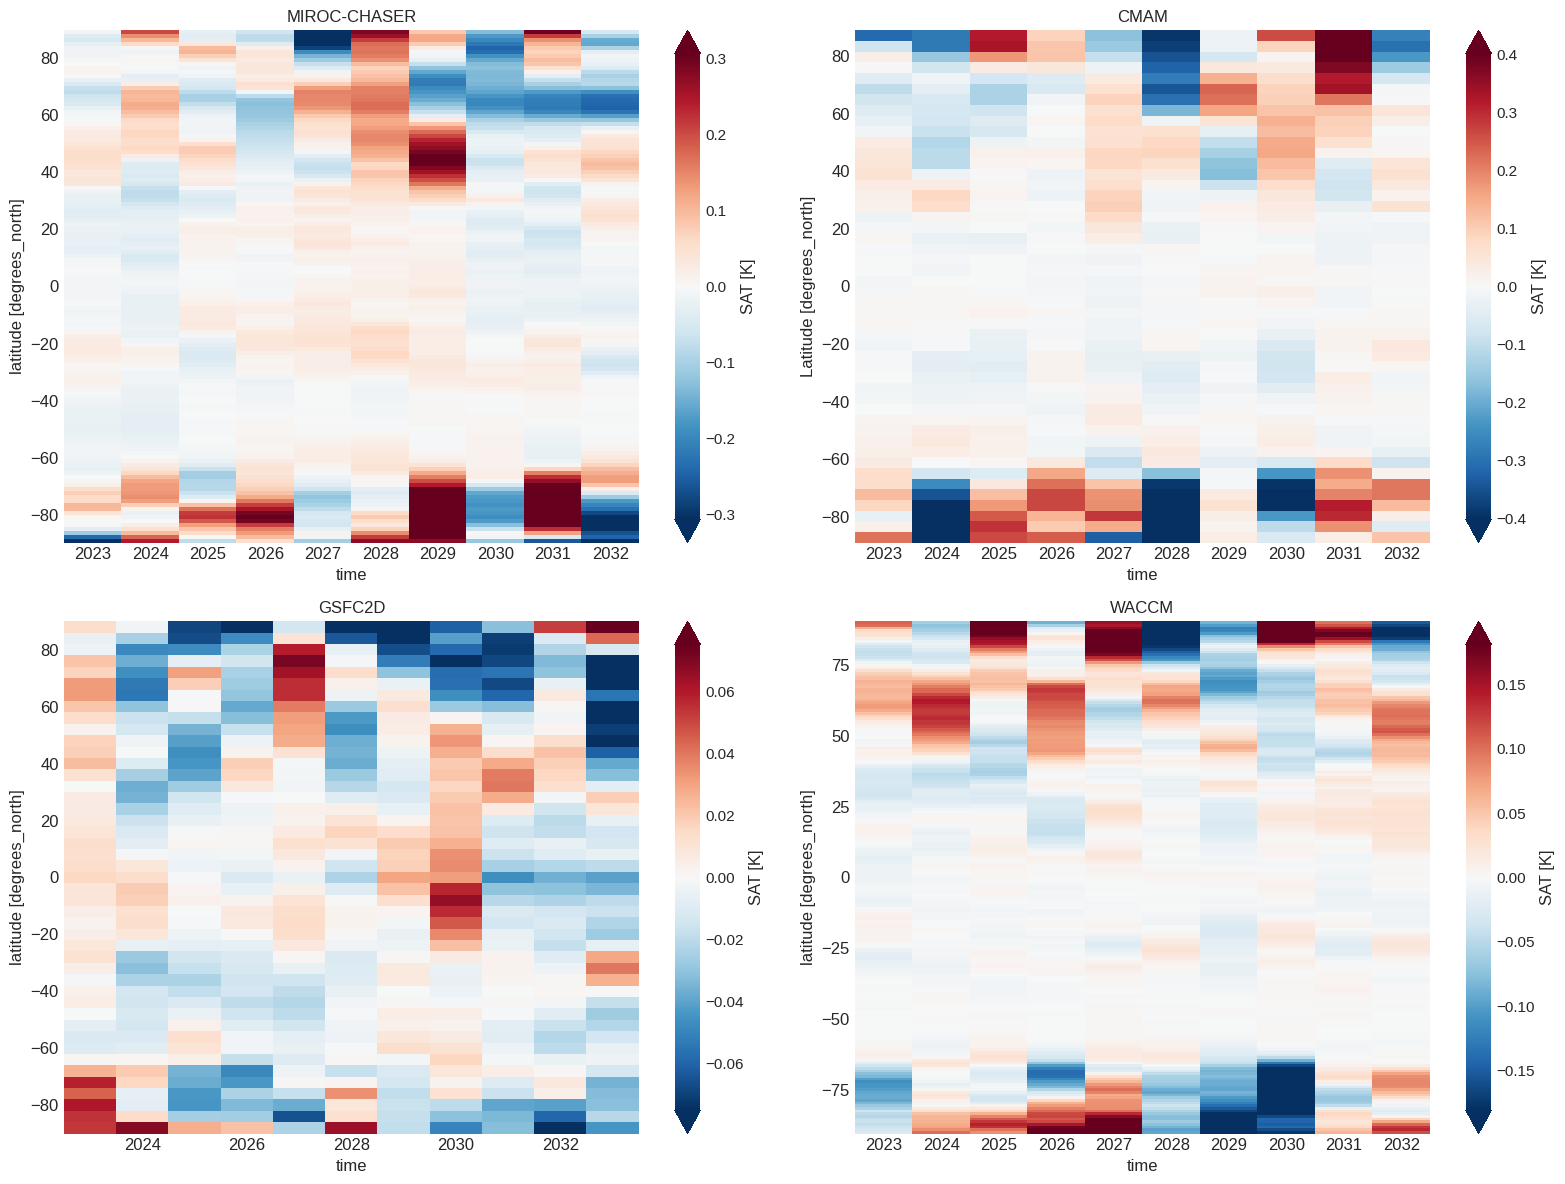

In [116]:
#calculating zonal mean for all datasets (GSFC2D s already zonal mean - no longitude)
miroc_w_sat_y_zm = miroc_w_sat_sel.mean("lon").load()
miroc_wo_sat_y_zm = miroc_wo_sat_sel.mean("lon").load()
cmam_w_sat_y_zm = cmam_w_sat_sel.mean("lon").load()
cmam_wo_sat_y_zm = cmam_wo_sat_sel.mean("lon").load()
waccm_w_sat_y_zm = waccm_w_sat_sel.mean("lon").load()
waccm_wo_sat_y_zm = waccm_wo_sat_sel.mean("lon").load()

# calculate difference between with and without (anomalies)
diff_miroc = miroc_w_sat_y_zm.mean("ens") - miroc_wo_sat_y_zm.mean("ens")
diff_cmam = cmam_w_sat_y_zm.mean("ens") - cmam_wo_sat_y_zm.mean("ens")
diff_GSFC2D = GSFC2D_w_sat_y_zm.mean("ens") - GSFC2D_wo_sat_y_zm.mean("ens")
diff_waccm = waccm_w_sat_y_zm.mean("ens") - waccm_wo_sat_y_zm.mean("ens")

# Create subplots with figure size set at this level
fig, axs = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 grid for 4 plots

# Plot 1: MIROC
diff_miroc.plot(x="time", robust=True, ax=axs[0, 0], cbar_kwargs={"label": "SAT [K]"})
axs[0, 0].set_title("MIROC-CHASER")
axs[0, 0].tick_params(axis = "x", labelsize = 12)
axs[0, 0].tick_params(axis = "y", labelsize = 12)

# Plot 2: CMAM
diff_cmam.plot(x="time", robust=True, ax=axs[0, 1], cbar_kwargs={"label": "SAT [K]"})
axs[0, 1].set_title("CMAM")
axs[0, 1].tick_params(axis = "x", labelsize = 12)
axs[0, 1].tick_params(axis = "y", labelsize = 12)

# Plot 3: GSFC2D
diff_GSFC2D.plot(x="time", robust=True, ax=axs[1, 0], cbar_kwargs={"label": "SAT [K]"})
axs[1, 0].set_title("GSFC2D")
axs[1, 0].tick_params(axis = "x", labelsize = 12)
axs[1, 0].tick_params(axis = "y", labelsize = 12)

# Plot 4: WACCM
diff_waccm.plot(x="time", robust=True, ax=axs[1, 1], cbar_kwargs={"label": "SAT [K]"})
axs[1, 1].set_title("WACCM")
axs[1, 1].tick_params(axis = "x", labelsize = 12)
axs[1, 1].tick_params(axis = "y", labelsize = 12)

# Show all plots
plt.tight_layout()  # Adjust spacing to avoid overlap
plt.show()

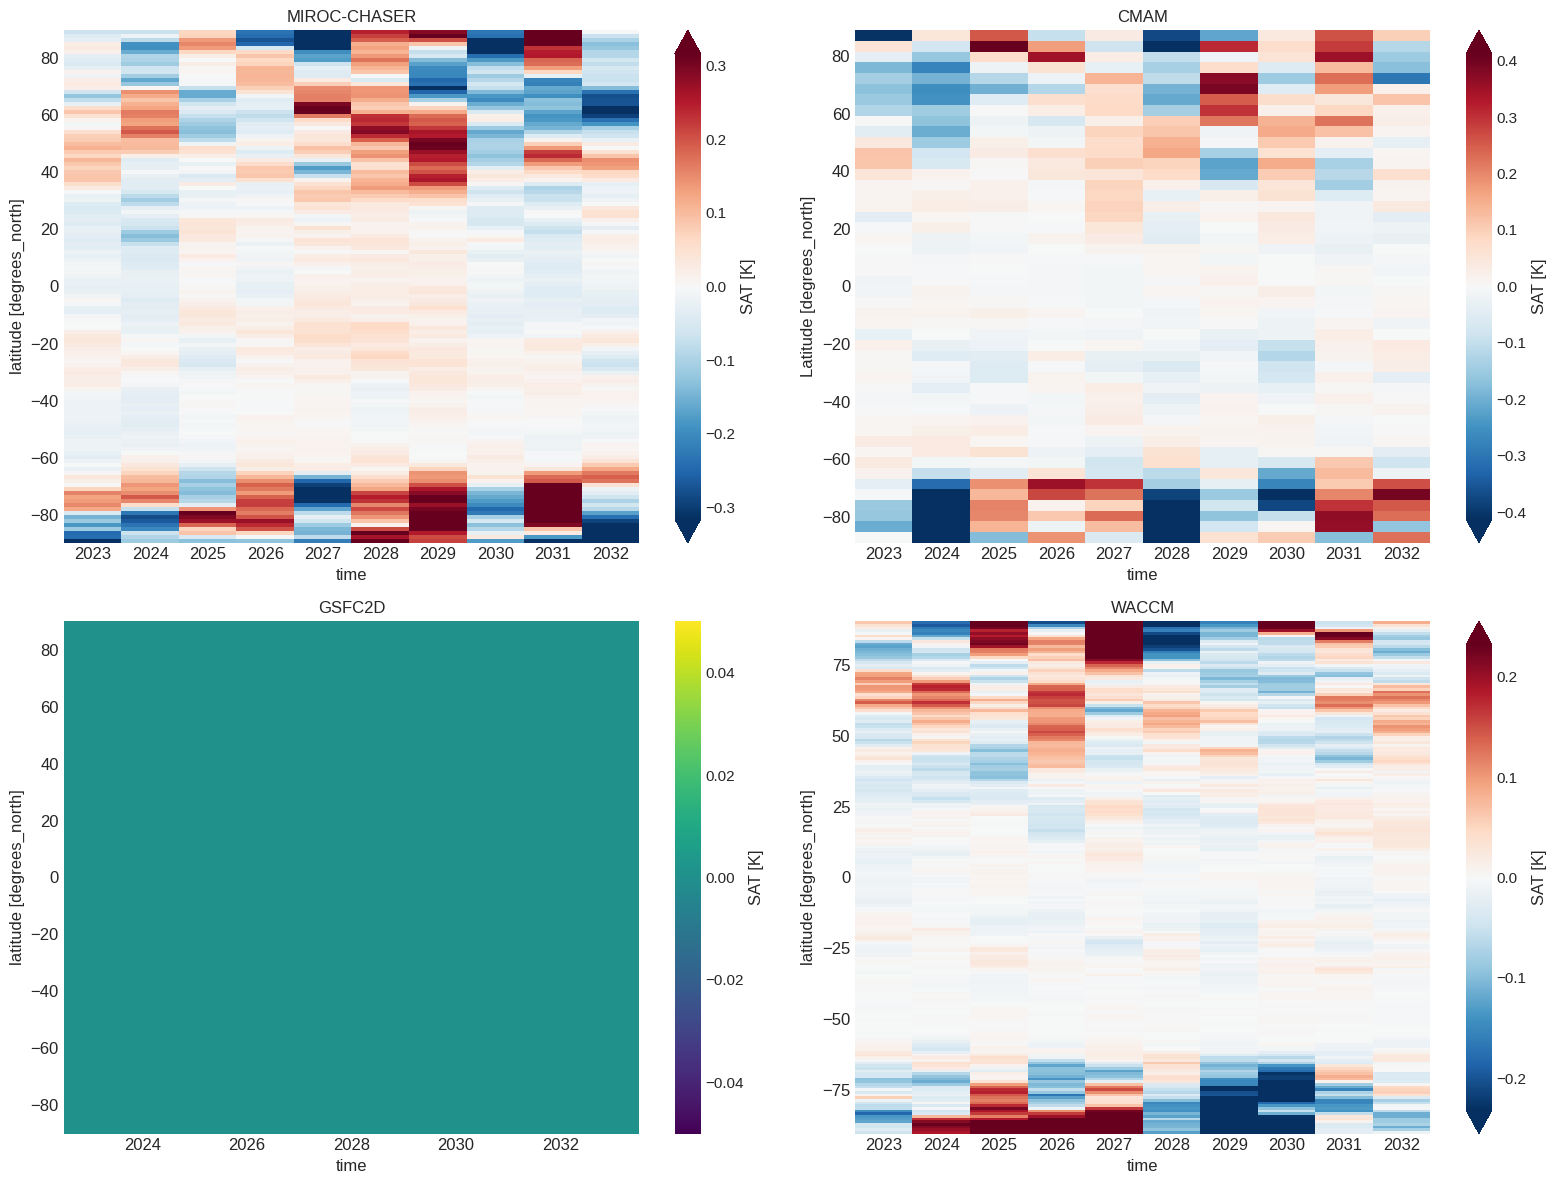

In [115]:
#Calculate the median difference for each model
diff_miroc_med = miroc_w_sat_y_zm.median("ens") - miroc_wo_sat_y_zm.median("ens")
diff_cmam_med = cmam_w_sat_y_zm.median("ens") - cmam_wo_sat_y_zm.median("ens")
diff_GSFC2D_med = GSFC2D_w_sat_y_zm.median("ens") - GSFC2D_wo_sat_y_zm.median("ens")
diff_waccm_med = waccm_w_sat_y_zm.median("ens") - waccm_wo_sat_y_zm.median("ens")

# Create subplots with figure size set at this level
fig, axs = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 grid for 4 plots

# Plot 1: MIROC
diff_miroc_med.plot(x="time", robust=True, ax=axs[0, 0], cbar_kwargs={"label": "SAT [K]"})
axs[0, 0].set_title("MIROC-CHASER")
axs[0, 0].tick_params(axis = "x", labelsize = 12)
axs[0, 0].tick_params(axis = "y", labelsize = 12)

# Plot 2: CMAM
diff_cmam_med.plot(x="time", robust=True, ax=axs[0, 1], cbar_kwargs={"label": "SAT [K]"})
axs[0, 1].set_title("CMAM")
axs[0, 1].tick_params(axis = "x", labelsize = 12)
axs[0, 1].tick_params(axis = "y", labelsize = 12)

# Plot 3: GSFC2D
diff_GSFC2D_med.plot(x="time", robust=True, ax=axs[1, 0], cbar_kwargs={"label": "SAT [K]"})
axs[1, 0].set_title("GSFC2D")
axs[1, 0].tick_params(axis = "x", labelsize = 12)
axs[1, 0].tick_params(axis = "y", labelsize = 12)

# Plot 4: WACCM
diff_waccm_med.plot(x="time", robust=True, ax=axs[1, 1], cbar_kwargs={"label": "SAT [K]"})
axs[1, 1].set_title("WACCM")
axs[1, 1].tick_params(axis = "x", labelsize = 12)
axs[1, 1].tick_params(axis = "y", labelsize = 12)
# Show all plots
plt.tight_layout()  # Adjust spacing to avoid overlap
plt.show()

In [65]:


spike_with_miroc = miroc_w_sat_sel_gm.diff('time')
spike_wo_miroc = miroc_wo_sat_sel_gm.diff('time')
spike_with_cmam = cmam_w_sat_sel_gm.diff('time')
spike_wo_cmam = cmam_wo_sat_sel_gm.diff('time')
spike_with_GSFC2D = GSFC2D_w_sat_sel_gm.diff('time')
spike_wo_GSFC2D = GSFC2D_wo_sat_sel_gm.diff('time')
spike_with_waccm = waccm_w_sat_sel_gm.diff('time')
spike_wo_waccm = waccm_wo_sat_sel_gm.diff('time')

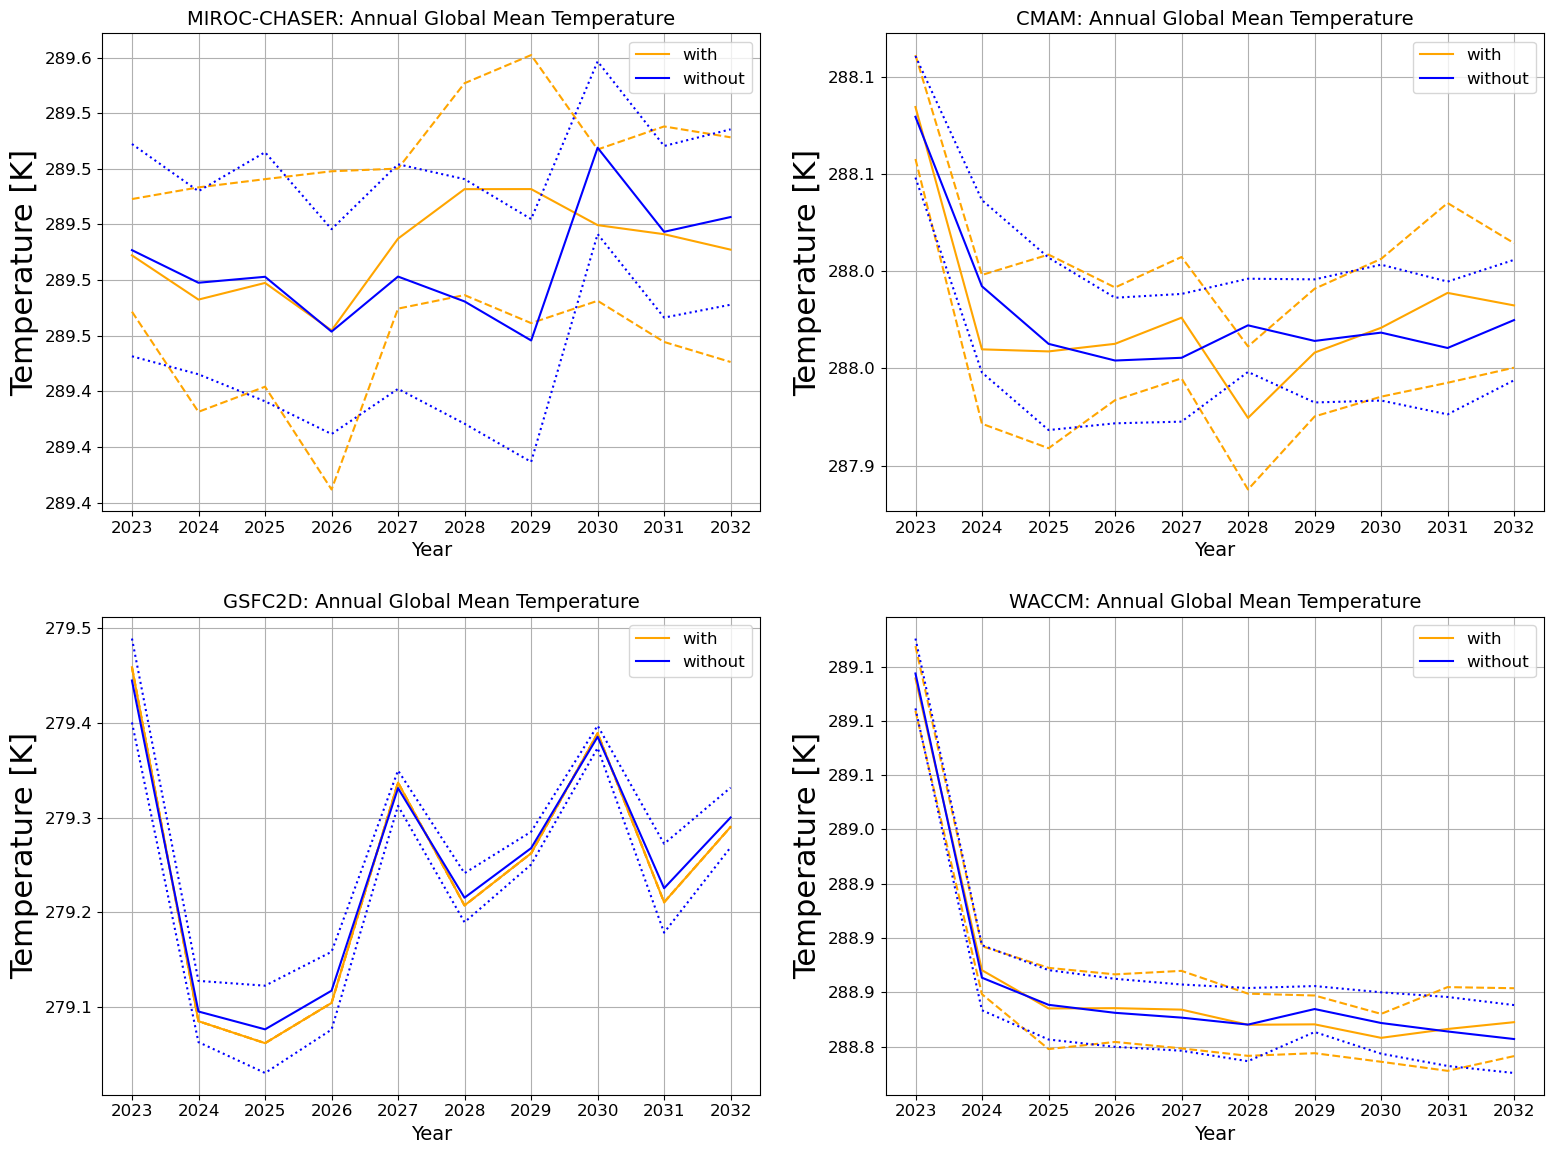

In [66]:
# List of models and corresponding data
models = [
    ("MIROC-CHASER", miroc_w_sat_sel_gm, miroc_wo_sat_sel_gm),
    ("CMAM", cmam_w_sat_sel_gm, cmam_wo_sat_sel_gm),
    ("GSFC2D", GSFC2D_w_sat_sel_gm, GSFC2D_wo_sat_sel_gm),
    ("WACCM", waccm_w_sat_sel_gm, waccm_wo_sat_sel_gm),
]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()  # Flatten to easily loop through

# Loop over each model and its subplot
for i, (title, data_with, data_without) in enumerate(models):
    ax = axs[i]
    ax.plot(data_with["time"], data_with.mean("ens").values, color="orange", label="with")
    ax.plot(data_with["time"], data_with.mean("ens").values + data_with.std("ens").values, color="orange", ls="--")
    ax.plot(data_with["time"], data_with.mean("ens").values - data_with.std("ens").values, color="orange", ls="--")
    ax.plot(data_without["time"], data_without.mean("ens").values, color="blue", label="without")
    ax.plot(data_without["time"], data_without.mean("ens").values + data_without.std("ens").values, color="blue", ls=":")
    ax.plot(data_without["time"], data_without.mean("ens").values - data_without.std("ens").values, color="blue", ls=":")

    #costumize plot
    ax.set_title(f"{title}: Annual Global Mean Temperature", fontsize = 14)
    ax.set_xlabel("Year", fontsize= 14)
    ax.set_ylabel("Temperature [K]")
    ax.grid(True)
    ax.legend(fontsize=12)
    ax.tick_params(axis = "x", labelsize = 12)
    ax.tick_params(axis = "y", labelsize = 12)

    # Format y-axis to show one decimal place
    ax.yaxis.set_major_formatter('{x:.1f}')

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [67]:
# create ds with seasons (DJF; MAM; JJA; SON) for each model - GSFC2D excluded because no longitude
miroc_w_season = miroc_w.weighted(weights_miroc).mean("ens").sat.groupby("time.season").mean("time", skipna = True)
miroc_wo_season = miroc_wo.weighted(weights_miroc).mean("ens").sat.groupby("time.season").mean("time", skipna = True)
miroc_anom_season = miroc_w_season - miroc_wo_season


cmam_w_season = cmam_w.weighted(weights_cmam).mean("ens").sat.groupby("time.season").mean("time", skipna = True)
cmam_wo_season = cmam_wo.weighted(weights_cmam).mean("ens").sat.groupby("time.season").mean("time", skipna = True)
cmam_anom_season = cmam_w_season - cmam_wo_season


waccm_w_season = waccm_w.weighted(weights_waccm).mean("ens").sat.groupby("time.season").mean("time", skipna = True)
waccm_wo_season = waccm_wo.weighted(weights_waccm).mean("ens").sat.groupby("time.season").mean("time", skipna = True)
waccm_anom_season = waccm_w_season - waccm_wo_season


#GSFC2D_w_season = GSFC2D_w_H2O.mean("ens").sat.groupby("time.season").mean("time", skipna = True)
#GSFC2D_wo_season = GSFC2D_wo.mean("ens").sat.groupby("time.season").mean("time", skipna = True)
#GSFC2D_anom_season = GSFC2D_w_season - GSFC2D_wo_season



In [68]:
#ceate list for seasons 
seasons = ["DJF", "MAM", "JJA", "SON"]
#create list with models and data (GSFC2D not included because it doesnt have lon)
models = [
    ("MIROC-CHASER", miroc_anom_season),
    ("CMAM", cmam_anom_season),
    ("WACCM", waccm_anom_season),
]
seasonal_anomalies = {}

# for loop to get seasonal data for each model
for title, data in models:
    for season in seasons:
        sel = f"{title}_{season}"
        seasonal_anomalies[sel] = data.sel(season=season)

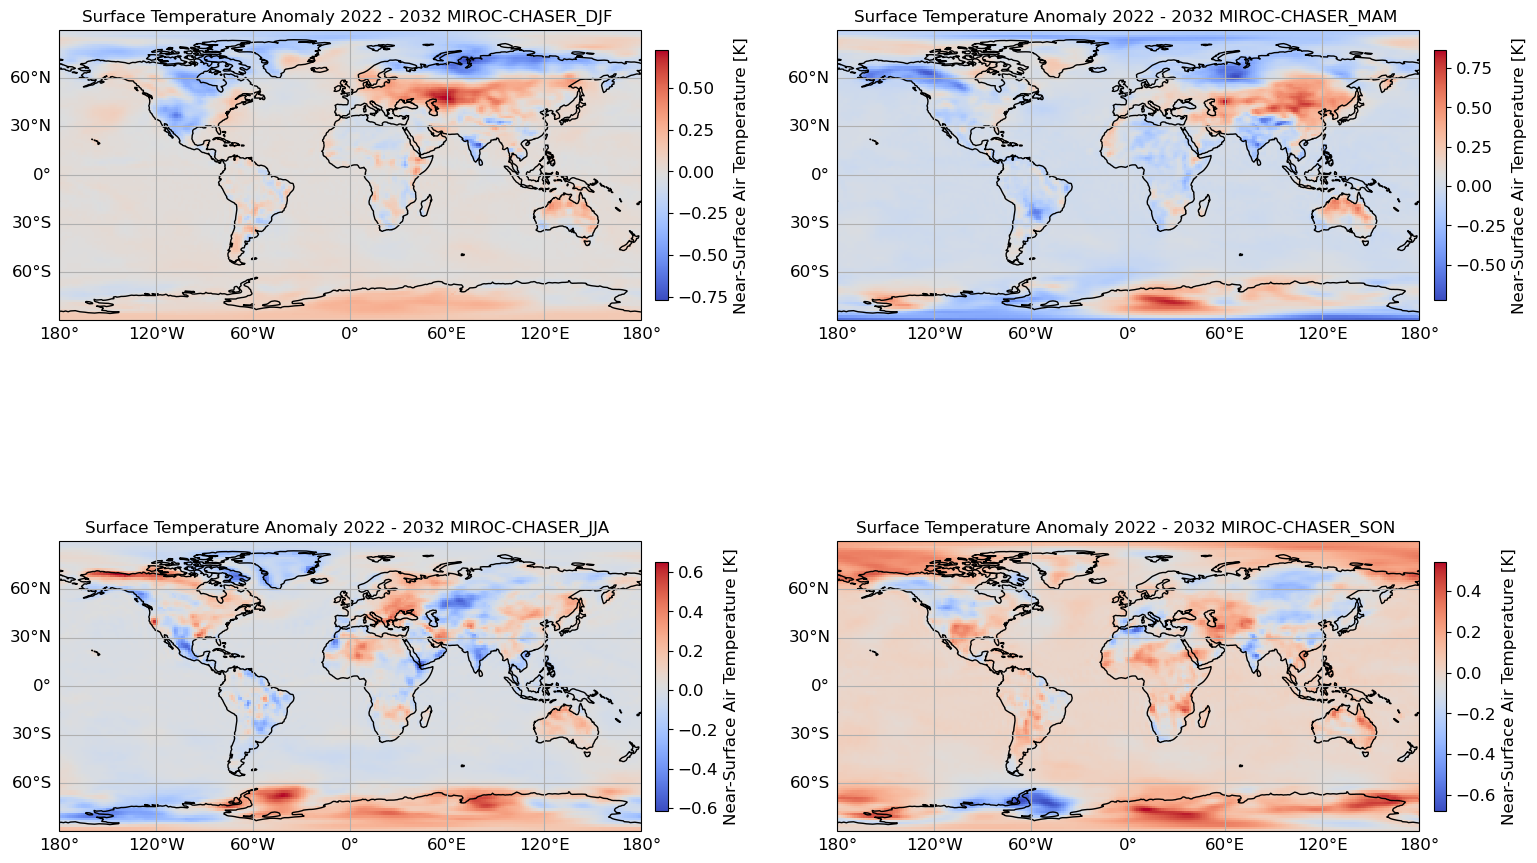

In [69]:
# Subplot grid for 2x2 layout (one plot per season)
fig, axs = plt.subplots(2, 2, figsize=(16, 12), subplot_kw={"projection": ccrs.PlateCarree()})
axs = axs.flatten()  # Convert 2x2 array of axes into a flat list for easy iteration

# List of seasons for MIROC-CHASER
miroc_seasons = ["MIROC-CHASER_DJF", "MIROC-CHASER_MAM", "MIROC-CHASER_JJA", "MIROC-CHASER_SON"]

# Loop over each season and corresponding axis
for ax, season in zip(axs, miroc_seasons):
    # Extract the data for the current season
    data = seasonal_anomalies[season]
    
    # Create the pcolormesh plot
    plot = ax.pcolormesh(
        data["lon"],
        data["lat"],
        data,
        transform=ccrs.PlateCarree(),
        cmap="coolwarm"
    )
    
    # Add coastlines and title
    ax.coastlines()
    ax.set_title(f"Surface Temperature Anomaly 2022 - 2032 {season} ", fontsize= 12)
    
    # Add colorbar for each subplot
    cbar = fig.colorbar(plot, ax=ax, orientation="vertical", pad=0.02, shrink=0.4)
    cbar.set_label("Near-Surface Air Temperature [K]", fontsize=12)
    cbar.ax.tick_params(labelsize=12)

    #add labels
    gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
    gl.top_labels = False  # Remove labels at the top
    gl.right_labels = False  # Remove labels at the right
    gl.xlabel_style = {"fontsize": 12}
    gl.ylabel_style = {"fontsize": 12}

plt.tight_layout()
plt.show()


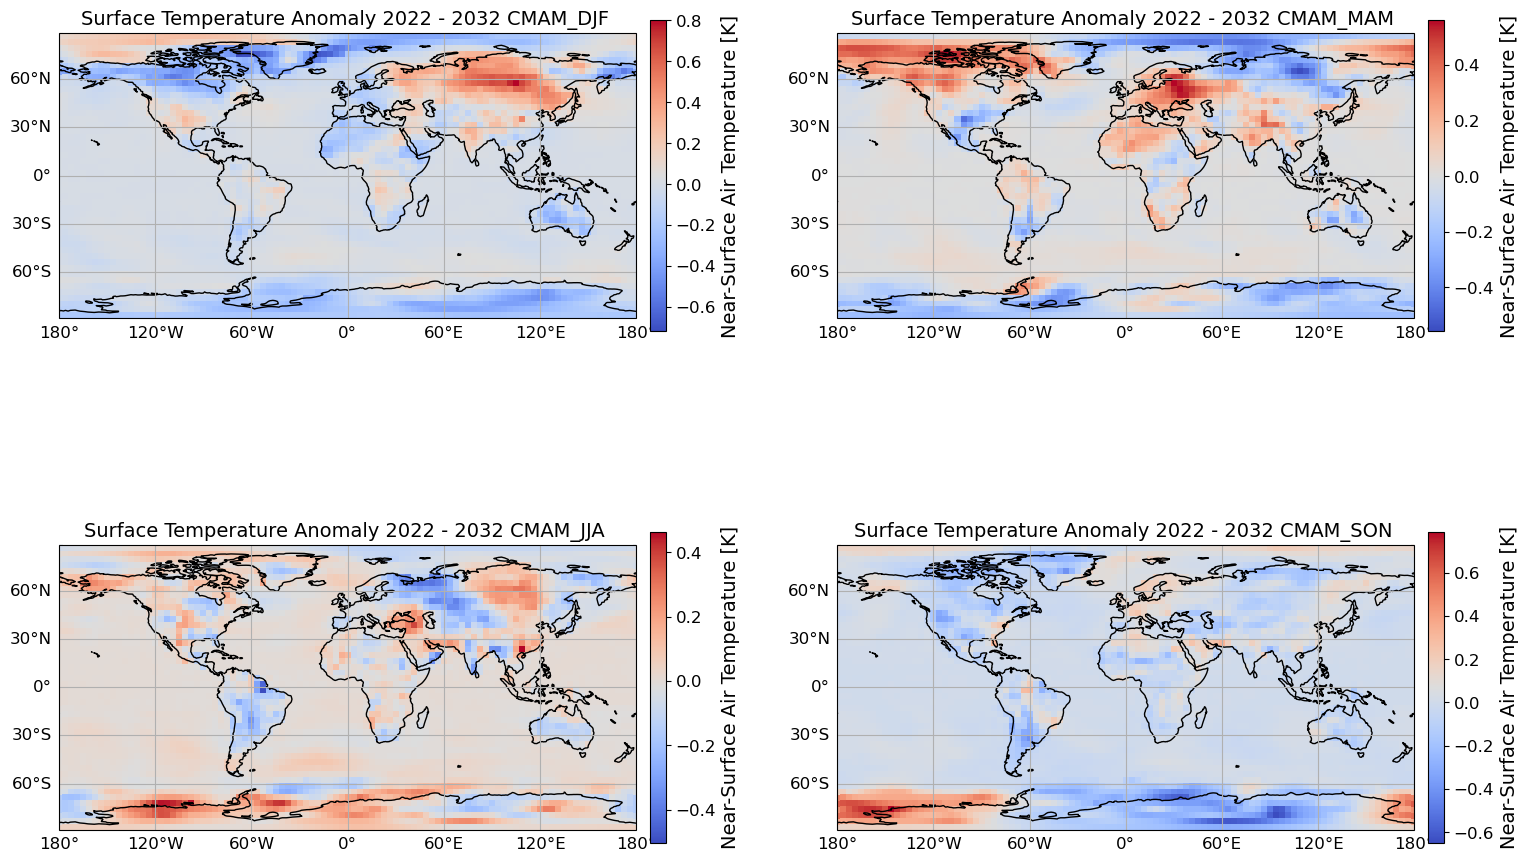

In [70]:
# Subplot grid for 2x2 layout (one plot per season)
fig, axs = plt.subplots(2, 2, figsize=(16, 12), subplot_kw={"projection": ccrs.PlateCarree()})
axs = axs.flatten()  # Convert 2x2 array of axes into a flat list for easy iteration

# List of seasons for miroc
cmam_seasons = ["CMAM_DJF", "CMAM_MAM", "CMAM_JJA", "CMAM_SON"]

# Loop over each season and axis
for ax, season in zip(axs, cmam_seasons):
    # Extract the data for the current season
    data = seasonal_anomalies[season]
    
    # Create the pcolormesh plot
    plot = ax.pcolormesh(
        data["lon"],
        data["lat"],
        data,
        transform=ccrs.PlateCarree(),
        cmap="coolwarm"
    )
    
    # Add coastlines and title
    ax.coastlines()
    ax.set_title(f"Surface Temperature Anomaly 2022 - 2032 {season} ", fontsize= 14)
    
    # Add colorbar for each subplot
    cbar = fig.colorbar(plot, ax=ax, orientation="vertical", pad=0.02, shrink=0.5)
    cbar.set_label("Near-Surface Air Temperature [K]", fontsize=14)
    cbar.ax.tick_params(labelsize=12)

    #add labels
    gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
    gl.top_labels = False  # Remove labels at the top
    gl.right_labels = False  # Remove labels at the right
    gl.xlabel_style = {"fontsize": 12}
    gl.ylabel_style = {"fontsize": 12}

plt.tight_layout()
plt.show()


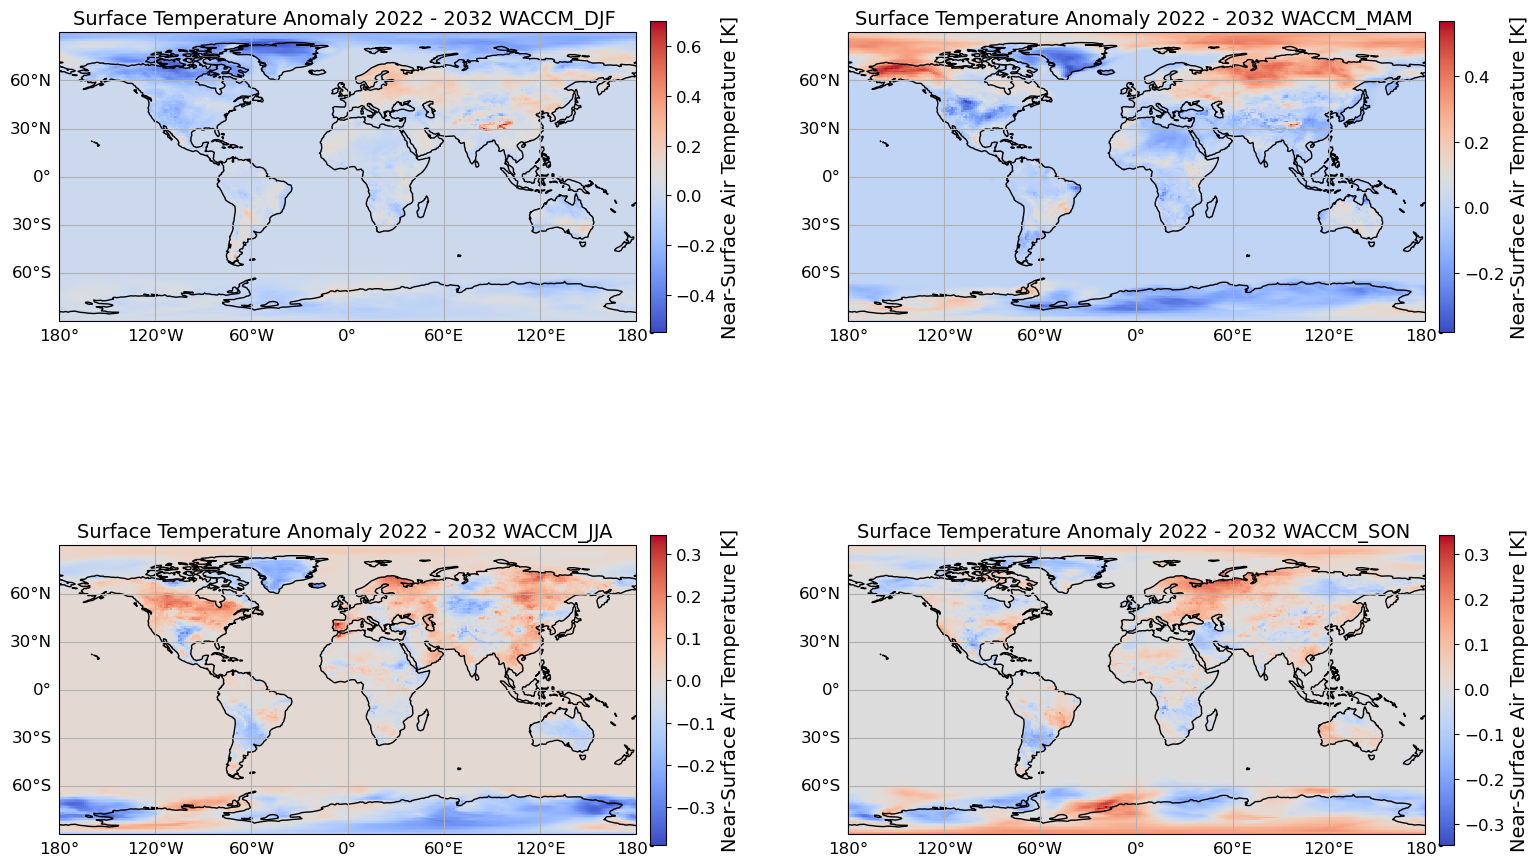

In [71]:
# Subplot grid for 2x2 layout (one plot per season)
fig, axs = plt.subplots(2, 2, figsize=(16, 12), subplot_kw={"projection": ccrs.PlateCarree()})
axs = axs.flatten()  # Convert 2x2 array of axes into a flat list for easy iteration

# List of seasons for MIROC-CHASER
cmam_seasons = ["WACCM_DJF", "WACCM_MAM", "WACCM_JJA", "WACCM_SON"]

# Loop over each season and corresponding axis
for ax, season in zip(axs, cmam_seasons):
    # Extract the data for the current season
    data = seasonal_anomalies[season]
    
    # Create the pcolormesh plot
    plot = ax.pcolormesh(
        data["lon"],
        data["lat"],
        data,
        transform=ccrs.PlateCarree(),
        cmap="coolwarm"
    )
    
    # Add coastlines and title
    ax.coastlines()
    ax.set_title(f"Surface Temperature Anomaly 2022 - 2032 {season} ", fontsize= 14)
    
    # Add colorbar for each subplot
    cbar = fig.colorbar(plot, ax=ax, orientation="vertical", pad=0.02, shrink=0.5)
    cbar.set_label("Near-Surface Air Temperature [K]", fontsize=14)

    #add labels
    gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
    gl.top_labels = False  # Remove labels at the top
    gl.right_labels = False  # Remove labels at the right
    gl.xlabel_style = {"fontsize": 12}
    gl.ylabel_style = {"fontsize": 12}
    cbar.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()


In [72]:
#MIROC 
years = [("2022", "2024"), ("2025", "2027"), ("2028", "2031")]
keys = ["f3y", "4to6", "rest"]
miroc_anom_timestamps = {}

# Use zip to loop over pairs of years and keys
for time, key in zip(years, keys):
    miroc_anom_timestamps[key] = (
        miroc_w.mean("ens")
        .sel(time=slice(*time))
        .sat.groupby("time.season")
        .mean("time")
        - miroc_wo.mean("ens")
        .sel(time=slice(*time))
        .sat.groupby("time.season")
        .mean("time")
    )

# Print the dictionary to check results
#print(miroc_anom_timestamps)

#CMAM
cmam_anom_timestamps = {}

# Use zip to loop over pairs of years and keys
for time, key in zip(years, keys):
    cmam_anom_timestamps[key] = (
        cmam_w.mean("ens")
        .sel(time=slice(*time))
        .sat.groupby("time.season")
        .mean("time")
        - cmam_wo.mean("ens")
        .sel(time=slice(*time))
        .sat.groupby("time.season")
        .mean("time")
    )


#WACCM
waccm_anom_timestamps = {}

# Use zip to loop over pairs of years and keys
for time, key in zip(years, keys):
    waccm_anom_timestamps[key] = (
        waccm_w.mean("ens")
        .sel(time=slice(*time))
        .sat.groupby("time.season")
        .mean("time")
        - waccm_wo.mean("ens")
        .sel(time=slice(*time))
        .sat.groupby("time.season")
        .mean("time")
    )

#print(waccm_anom_timestamps)
    


{'f3y': <xarray.DataArray 'sat' (season: 4, lat: 48, lon: 96)> Size: 74kB
dask.array<sub, shape=(4, 48, 96), dtype=float32, chunksize=(1, 48, 96), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 384B -87.16 -83.48 -79.78 ... 79.78 83.48 87.16
  * lon      (lon) float64 768B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
  * season   (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually 2 metres) air temperature
    units:          K
    original_name:  ST
    history:        degctok 2024-09-16T20:50:32Z altered by CMOR: Reordered d...
    cell_methods:   area: time: mean
    cell_measures:  area: areacella, '4to6': <xarray.DataArray 'sat' (season: 4, lat: 48, lon: 96)> Size: 74kB
dask.array<sub, shape=(4, 48, 96), dtype=float32, chunksize=(1, 48, 96), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 384B -87.16 -83.48 -79.78 .

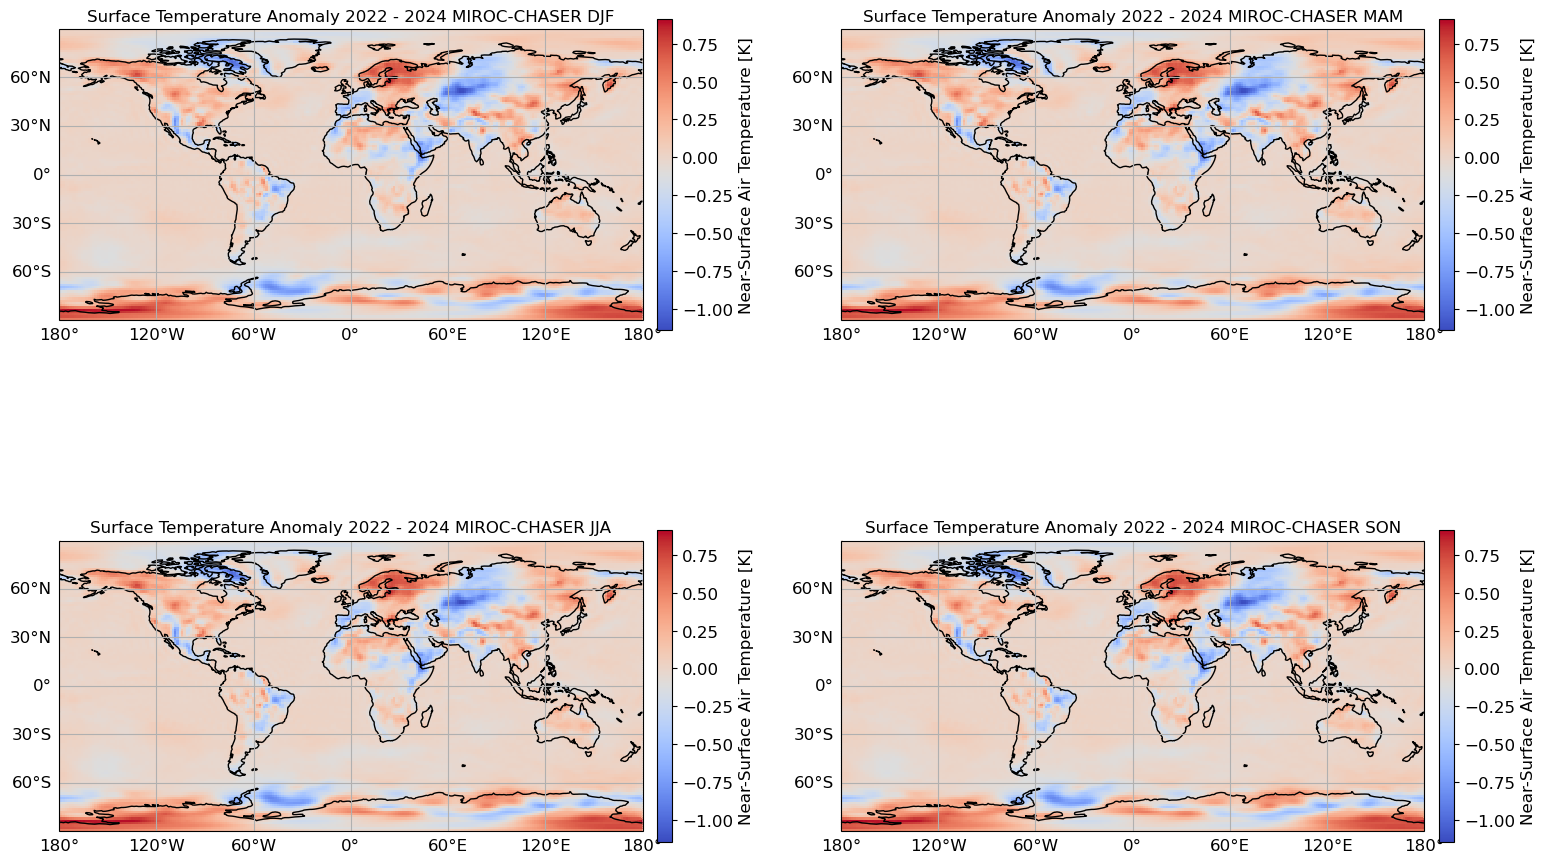

In [73]:
# setting plot params
fig, axs = plt.subplots(2,2, figsize = (16, 12),
                   subplot_kw = {"projection": ccrs.PlateCarree()})
axs = axs.flatten()
miroc_anom_f3y_season = {}
periods = ["f3y", "4to6", "rest"]


for ax, season in zip(axs, seasons):
    data = miroc_anom_timestamps["f3y"][season == season]

    plot = ax.pcolormesh(
        data["lon"],
        data["lat"],
        data,
        transform = ccrs.PlateCarree(),
        cmap = "coolwarm"
    )
    #
    ax.coastlines()
    ax.set_title(f"Surface Temperature Anomaly 2022 - 2024 MIROC-CHASER {season}", fontsize= 12)

    #
    cbar = fig.colorbar(plot, ax=ax, orientation="vertical", pad=0.02, shrink=0.5)
    cbar.set_label("Near-Surface Air Temperature [K]", fontsize=12)
    cbar.ax.tick_params(labelsize=12)

    #add labels
    gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
    gl.top_labels = False  # Remove labels at the top
    gl.right_labels = False  # Remove labels at the right
    gl.xlabel_style = {"fontsize": 12}
    gl.ylabel_style = {"fontsize": 12}

plt.tight_layout()
plt.show()


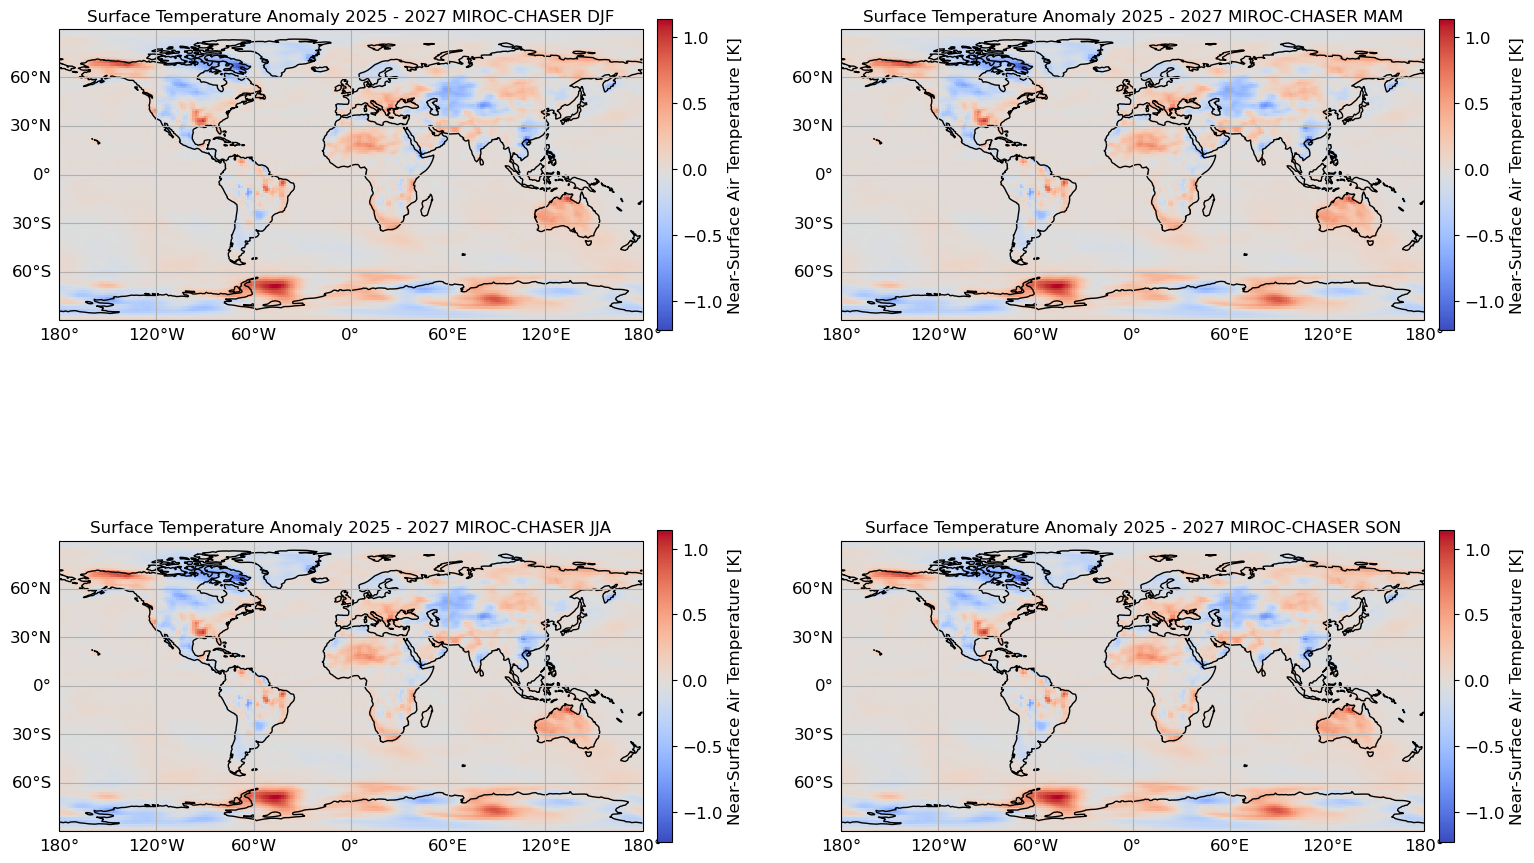

In [74]:
fig, axs = plt.subplots(2,2, figsize = (16, 12),
                   subplot_kw = {"projection": ccrs.PlateCarree()})
axs = axs.flatten()

for ax, season in zip(axs, seasons):
    data = miroc_anom_timestamps["4to6"][season == season]

    plot = ax.pcolormesh(
        data["lon"],
        data["lat"],
        data,
        transform = ccrs.PlateCarree(),
        cmap = "coolwarm"
    )
    #
    ax.coastlines()
    ax.set_title(f"Surface Temperature Anomaly 2025 - 2027 MIROC-CHASER {season}", fontsize= 12)

    #
    cbar = fig.colorbar(plot, ax=ax, orientation="vertical", pad=0.02, shrink=0.5)
    cbar.set_label("Near-Surface Air Temperature [K]", fontsize=12)
    cbar.ax.tick_params(labelsize=12)

    #add labels
    gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
    gl.top_labels = False  # Remove labels at the top
    gl.right_labels = False  # Remove labels at the right
    gl.xlabel_style = {"fontsize": 12}
    gl.ylabel_style = {"fontsize": 12}

plt.tight_layout()
plt.show()


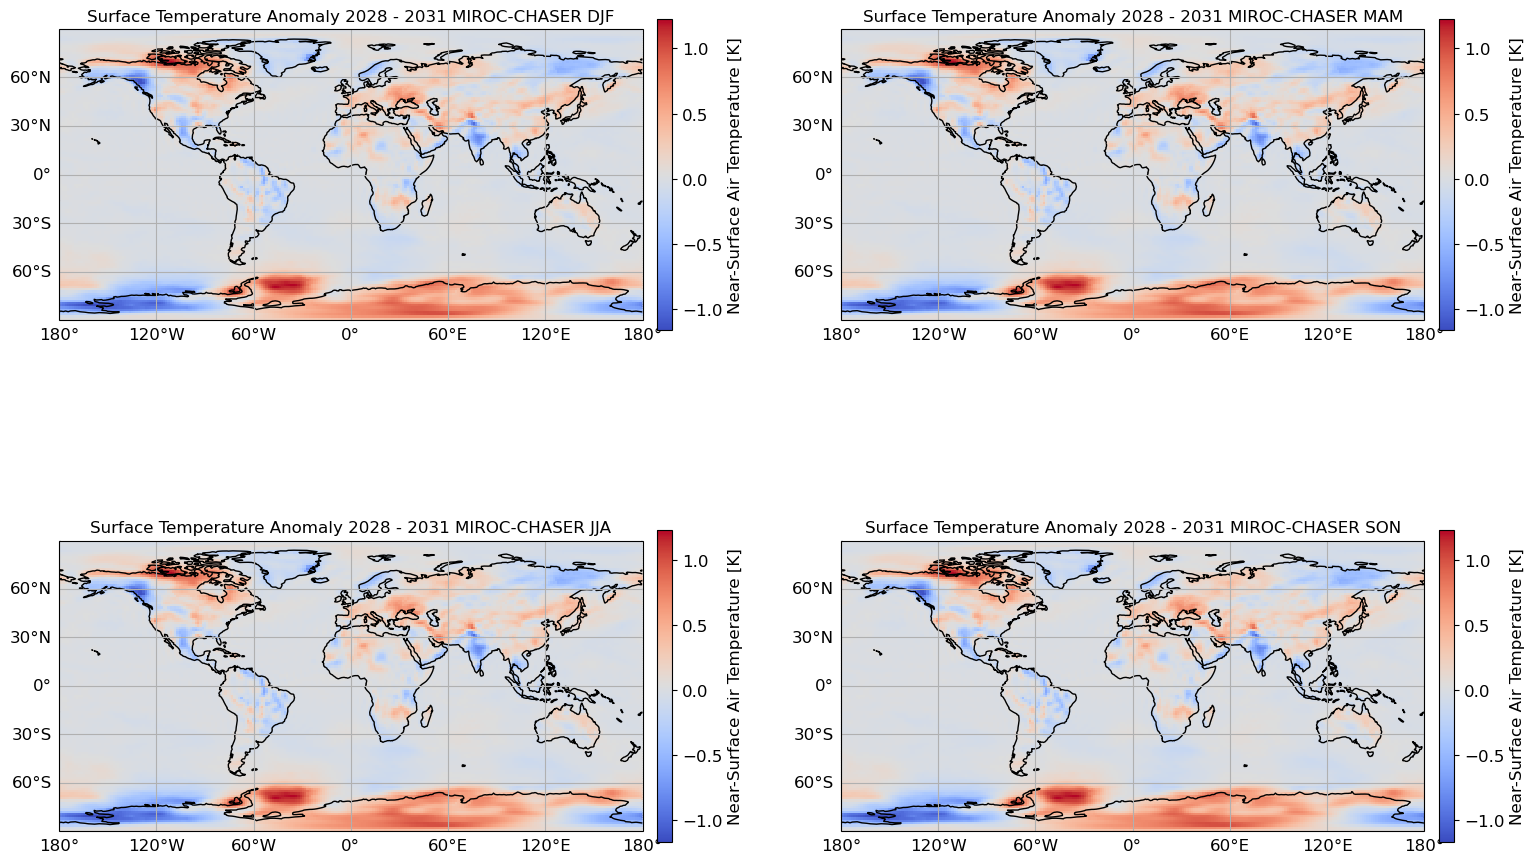

In [75]:
fig, axs = plt.subplots(2,2, figsize = (16, 12),
                   subplot_kw = {"projection": ccrs.PlateCarree()})
axs = axs.flatten()

for ax, season in zip(axs, seasons):
    data = miroc_anom_timestamps["rest"][season == season]

    plot = ax.pcolormesh(
        data["lon"],
        data["lat"],
        data,
        transform = ccrs.PlateCarree(),
        cmap = "coolwarm"
    )
    #
    ax.coastlines()
    ax.set_title(f"Surface Temperature Anomaly 2028 - 2031 MIROC-CHASER {season}", fontsize= 12)

    #
    cbar = fig.colorbar(plot, ax=ax, orientation="vertical", pad=0.02, shrink=0.5)
    cbar.set_label("Near-Surface Air Temperature [K]", fontsize=12)
    cbar.ax.tick_params(labelsize=12)

    #add labels
    gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
    gl.top_labels = False  # Remove labels at the top
    gl.right_labels = False  # Remove labels at the right
    gl.xlabel_style = {"fontsize": 12}
    gl.ylabel_style = {"fontsize": 12}

plt.tight_layout()
plt.show()


In [76]:
cmam_w = cmam_w.drop_dims("bnds")
cmam_wo = cmam_wo.drop_dims("bnds")
cmam_w

<xarray.Dataset> Size: 22MB
Dimensions:  (ens: 10, time: 120, lat: 48, lon: 96)
Coordinates:
  * time     (time) datetime64[ns] 960B 2022-02-28 2022-03-31 ... 2032-01-31
  * lat      (lat) float64 384B -87.16 -83.48 -79.78 ... 79.78 83.48 87.16
  * lon      (lon) float64 768B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
  * ens      (ens) int64 80B 1 2 3 4 5 6 7 8 9 10
Data variables:
    sat      (ens, time, lat, lon) float32 22MB dask.array<chunksize=(1, 1, 48, 96), meta=np.ndarray>
Attributes: (12/55)
    CCCma_model_hash:            Unknown
    CCCma_parent_runid:          dp980j
    CCCma_pycmor_hash:           1614c687d25a23dfb7a9a57540ee5aab277cc3fa
    CCCma_runid:                 dp981j
    Conventions:                 CF-1.7
    DISCLAIMER:                  PRELIMINARY DATA - NOT FOR PUBLICATION.
    ...                          ...
    tracking_id:                 4362be99-ba40-4e55-95ef-b4000b3fac26
    variable_id:                 tas
    variant_label:               r10i1p1f1
    version:                     v20240718
    license:                     HTHHMOC model data produced by The Governmen...
    cmor_version:                3.5.0

In [77]:
#CMAM 
#flatten temperature data across all dimensions except ensembles
cmam_w_stack = cmam_w.sat.mean("ens").resample(time = "1YE").mean().stack(all_dims = ("time", "lat", "lon")).values
cmam_wo_stack = cmam_wo.sat.mean("ens").resample(time = "1YE").mean().stack(all_dims = ("time", "lat", "lon")).values

# perform Kolmogorov Smirnov Test
statistic, p_value = ks_2samp(cmam_w_stack, cmam_wo_stack)
print(f"CMAM: K-S Statistic: {statistic}")
print(f"CMAM: P-value: {p_value}")

#MIROC 
#flatten temperature data across all dimensions except ensembles
miroc_w_stack = miroc_w.sat.mean("ens").resample(time = "1YE").mean().stack(all_dims = ("time", "lat", "lon")).values
miroc_wo_stack = miroc_wo.sat.mean("ens").resample(time = "1YE").mean().stack(all_dims = ("time", "lat", "lon")).values

# perform Kolmogorov Smirnov Test
statistic, p_value = ks_2samp(miroc_w_stack, miroc_wo_stack)
print(f"MIROC: K-S Statistic: {statistic}")
print(f"MIROC: P-value: {p_value}")

#GSFC2D
#flatten temperature data across all dimensions except ensembles
GSFC2D_w_stack = GSFC2D_w_H2O.sat.mean("ens").resample(time = "1YE").mean().stack(all_dims = ("time", "lat")).values
GSFC2D_wo_stack = GSFC2D_wo.sat.mean("ens").resample(time = "1YE").mean().stack(all_dims = ("time", "lat")).values

# perform Kolmogorov Smirnov Test
statistic, p_value = ks_2samp(GSFC2D_w_stack, GSFC2D_wo_stack)
print(f"GSFC2D: K-S Statistic: {statistic}")
print(f"GSFC2D: P-value: {p_value}")

#WACCM 
#flatten temperature data across all dimensions except ensembles
waccm_w_stack = waccm_w.sat.mean("ens").resample(time = "1YE").mean().stack(all_dims = ("time", "lat", "lon")).values
waccm_wo_stack = waccm_wo.sat.mean("ens").resample(time = "1YE").mean().stack(all_dims = ("time", "lat", "lon")).values

# perform Kolmogorov Smirnov Test
statistic, p_value = ks_2samp(waccm_w_stack, waccm_wo_stack)
print(f"WACCM: K-S Statistic: {statistic}")
print(f"WACCM: P-value: {p_value}")

CMAM: K-S Statistic: 0.0023082386363636326
CMAM: P-value: 0.9992288629325295
MIROC: K-S Statistic: 0.0025274103338068232
MIROC: P-value: 0.19948728993735576
GSFC2D: K-S Statistic: 0.010101010101010102
GSFC2D: P-value: 0.9999999999999998
WACCM: K-S Statistic: 0.001788720538720534
WACCM: P-value: 0.28448340432369745


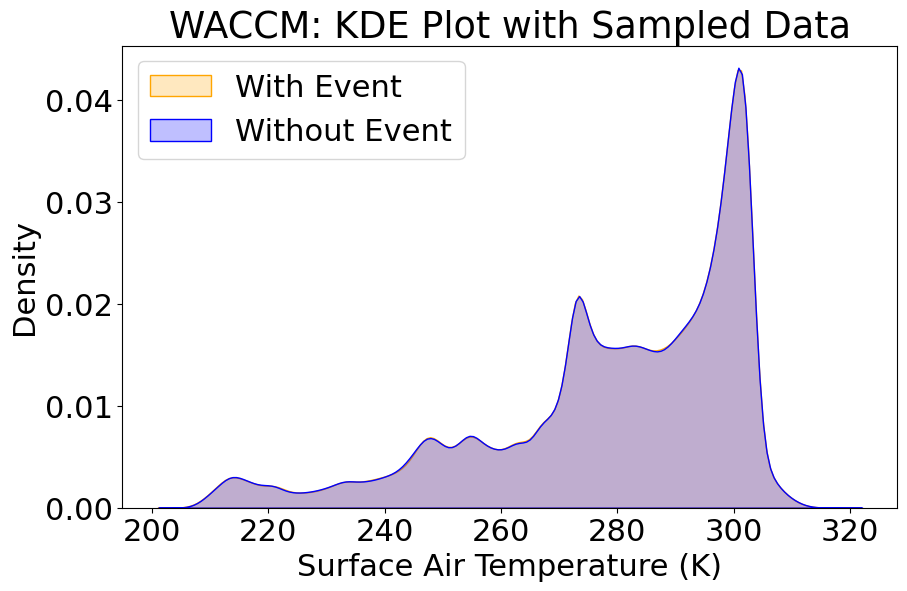

In [78]:
# create 1d array for with and without
waccm_w_flat = waccm_w['sat'].mean("ens").stack(all_dims=("time", "lat", "lon")).values.flatten()
waccm_wo_flat = waccm_wo['sat'].mean("ens").stack(all_dims=("time", "lat", "lon")).values.flatten()

sample_size = 1000_000  # select sample size
waccm_w_sample = np.random.choice(waccm_w_flat, sample_size, replace=False)
waccm_wo_sample = np.random.choice(waccm_wo_flat, sample_size, replace=False)

# Plot KDE with sampled data
plt.figure(figsize=(10, 6))
sns.kdeplot(waccm_w_sample, label="With Event", color='orange', fill=True)
sns.kdeplot(waccm_wo_sample, label="Without Event", color='blue', fill=True)
plt.title("WACCM: KDE Plot with Sampled Data")
plt.xlabel("Surface Air Temperature (K)")
plt.ylabel("Density")
plt.legend()
plt.show()

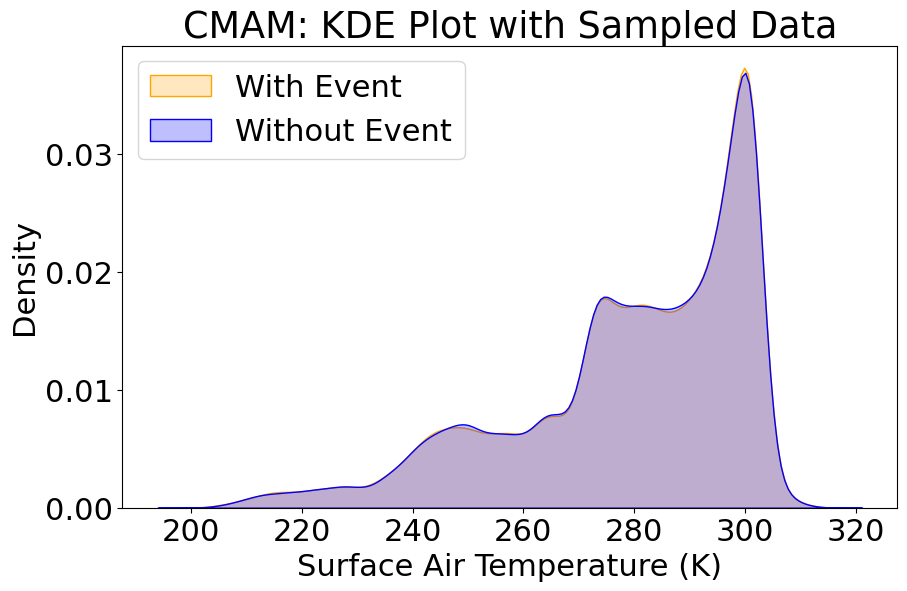

In [79]:
cmam_w_flat = cmam_w['sat'].mean("ens").stack(all_dims=("time", "lat", "lon")).values.flatten()
cmam_wo_flat = cmam_wo['sat'].mean("ens").stack(all_dims=("time", "lat", "lon")).values.flatten()

sample_size = 100_000  # select sample size
cmam_w_sample = np.random.choice(cmam_w_flat, sample_size, replace=False)
cmam_wo_sample = np.random.choice(cmam_wo_flat, sample_size, replace=False)

# Plot KDE with sampled data
plt.figure(figsize=(10, 6))
sns.kdeplot(cmam_w_sample, label="With Event", color='orange', fill=True)
sns.kdeplot(cmam_wo_sample, label="Without Event", color='blue', fill=True)
plt.title("CMAM: KDE Plot with Sampled Data")
plt.xlabel("Surface Air Temperature (K)")
plt.ylabel("Density")
plt.legend()
plt.show()

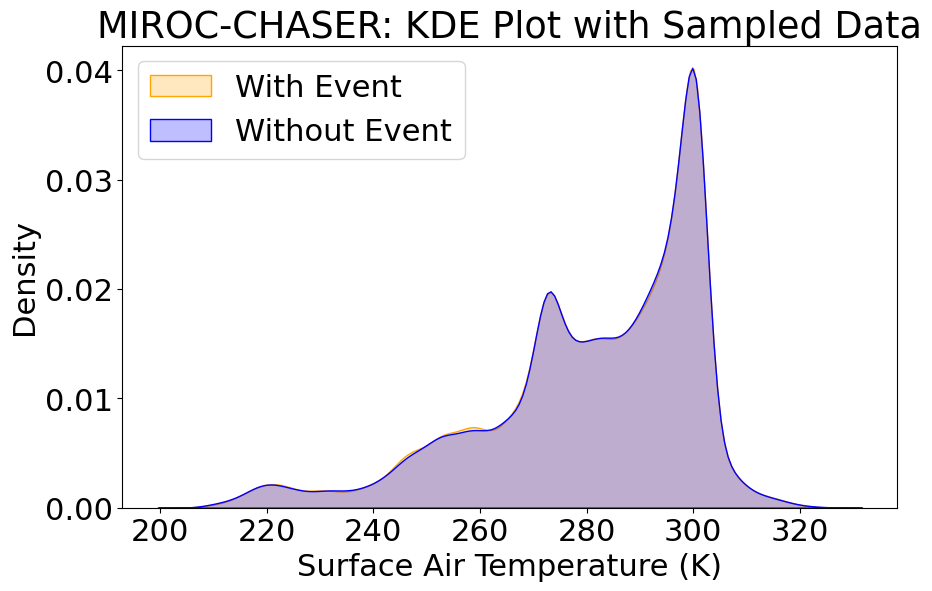

In [80]:
miroc_w_flat = miroc_w['sat'].mean("ens").stack(all_dims=("time", "lat", "lon")).values.flatten()
miroc_wo_flat = miroc_wo['sat'].mean("ens").stack(all_dims=("time", "lat", "lon")).values.flatten()

sample_size = 100_000  # select sample size
miroc_w_sample = np.random.choice(miroc_w_flat, sample_size, replace=False)
miroc_wo_sample = np.random.choice(miroc_wo_flat, sample_size, replace=False)

# Plot KDE with sampled data
plt.figure(figsize=(10, 6))
sns.kdeplot(miroc_w_sample, label="With Event", color='orange', fill=True)
sns.kdeplot(miroc_wo_sample, label="Without Event", color='blue', fill=True)
plt.title("MIROC-CHASER: KDE Plot with Sampled Data")
plt.xlabel("Surface Air Temperature (K)")
plt.ylabel("Density")
plt.legend()
plt.show()

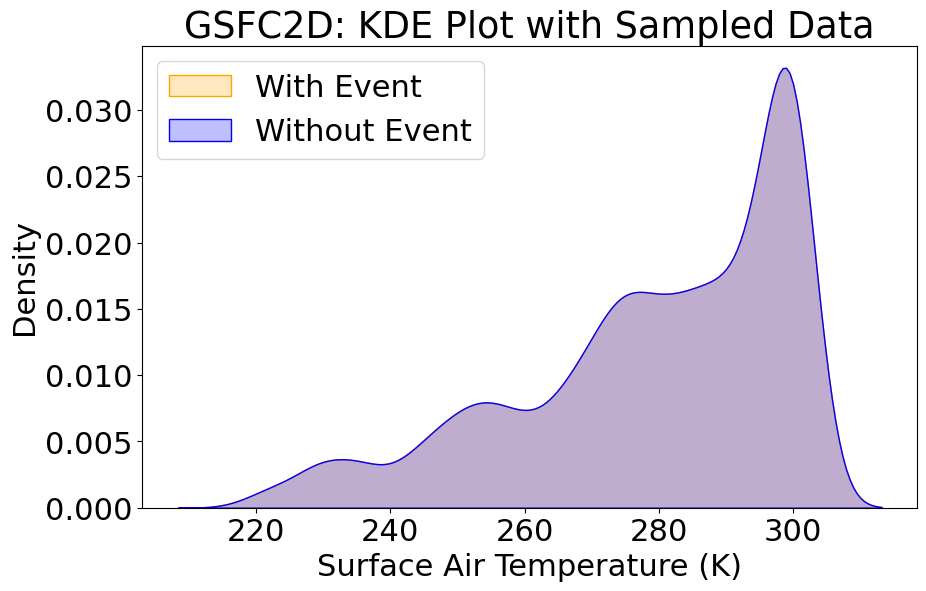

In [81]:
GSFC2D_w_flat = GSFC2D_w_H2O['sat'].mean("ens").stack(all_dims=("time", "lat")).values.flatten()
GSFC2D_wo_flat = GSFC2D_wo['sat'].mean("ens").stack(all_dims=("time", "lat")).values.flatten()

# Plot KDE with sampled data
plt.figure(figsize=(10, 6))
sns.kdeplot(GSFC2D_w_flat, label="With Event", color='orange', fill=True)
sns.kdeplot(GSFC2D_wo_flat, label="Without Event", color='blue', fill=True)
plt.title("GSFC2D: KDE Plot with Sampled Data")
plt.xlabel("Surface Air Temperature (K)")
plt.ylabel("Density")
plt.legend()
plt.show()

In [82]:
#create dataframe with annual sat for each ensemble with and without HTHH
#MIROC
df_miroc =  miroc_w_sat_sel_gm.to_dataframe().reset_index()
df_miroc['time'] = df_miroc.time.dt.strftime('%Y')
df_miroc['what'] = df_miroc.shape[0]*['with']
df_miroc_wo =  miroc_wo_sat_sel_gm.to_dataframe().reset_index()
df_miroc_wo['what'] = df_miroc_wo.shape[0]*['without']
df_miroc_wo['time'] = df_miroc_wo.time.dt.strftime('%Y')
df_miroc_all = pd.concat([df_miroc, df_miroc_wo])


#CMAM
df_cmam =  cmam_w_sat_sel_gm.to_dataframe().reset_index()
df_cmam['time'] = df_cmam.time.dt.strftime('%Y')
df_cmam['what'] = df_cmam.shape[0]*['with']
df_cmam_wo =  cmam_wo_sat_sel_gm.to_dataframe().reset_index()
df_cmam_wo['what'] = df_cmam_wo.shape[0]*['without']
df_cmam_wo['time'] = df_cmam_wo.time.dt.strftime('%Y')
df_cmam_all = pd.concat([df_cmam, df_cmam_wo])


#GSFC2D
df_GSFC2D =  GSFC2D_w_sat_sel_gm.to_dataframe().reset_index()
df_GSFC2D['time'] = df_GSFC2D.time.dt.strftime('%Y')
df_GSFC2D['what'] = df_GSFC2D.shape[0]*['with']
df_GSFC2D_wo =  GSFC2D_wo_sat_sel_gm.to_dataframe().reset_index()
df_GSFC2D_wo['what'] = df_GSFC2D_wo.shape[0]*['without']
df_GSFC2D_wo['time'] = df_GSFC2D_wo.time.dt.strftime('%Y')
df_GSFC2D_all = pd.concat([df_GSFC2D, df_GSFC2D_wo])
df_GSFC2D_all

#WACCM
df_waccm =  waccm_w_sat_sel_gm.to_dataframe().reset_index()
df_waccm['time'] = df_waccm.time.dt.strftime('%Y')
df_waccm['what'] = df_waccm.shape[0]*['with']
df_waccm_wo =  waccm_wo_sat_sel_gm.to_dataframe().reset_index()
df_waccm_wo['what'] = df_waccm_wo.shape[0]*['without']
df_waccm_wo['time'] = df_waccm_wo.time.dt.strftime('%Y')
df_waccm_all = pd.concat([df_waccm, df_waccm_wo])
df_waccm_all

ens  time         sat     what
0      1  2022  289.164659     with
1      1  2023  288.873573     with
2      1  2024  288.772533     with
3      1  2025  288.837443     with
4      1  2026  288.825103     with
..   ...   ...         ...      ...
195   20  2027  288.783186  without
196   20  2028  288.815556  without
197   20  2029  288.807848  without
198   20  2030  288.865808  without
199   20  2031  288.801182  without

[400 rows x 4 columns]

<Axes: xlabel='time', ylabel='sat'>

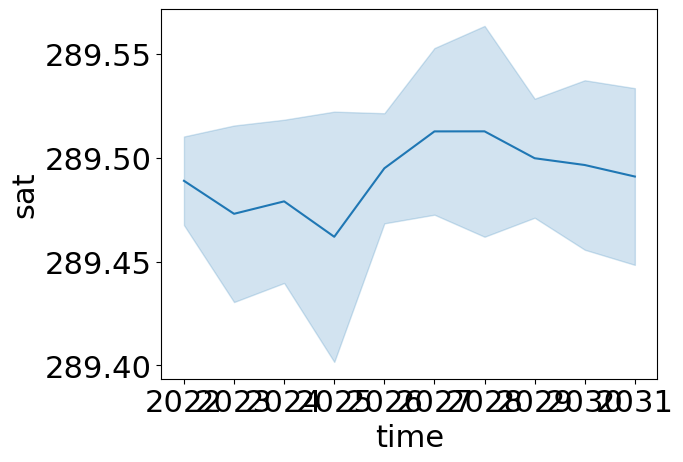

In [83]:
sns.lineplot(data=df_miroc, x="time", y="sat", errorbar='sd')

<Axes: xlabel='time', ylabel='sat'>

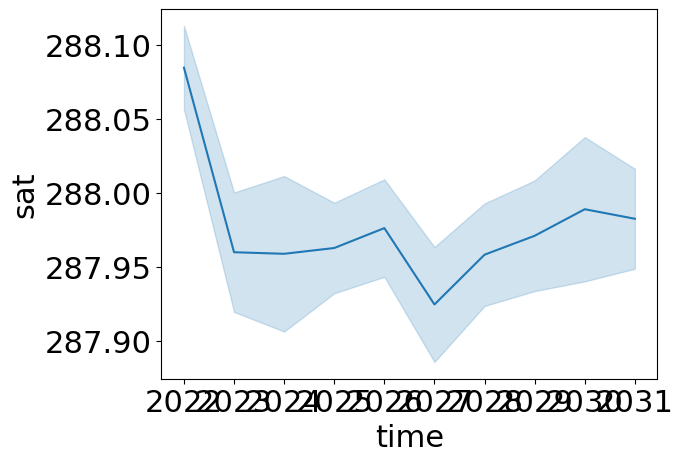

In [84]:
sns.lineplot(data=df_cmam, x="time", y="sat", errorbar='sd')

<Axes: xlabel='time', ylabel='sat'>

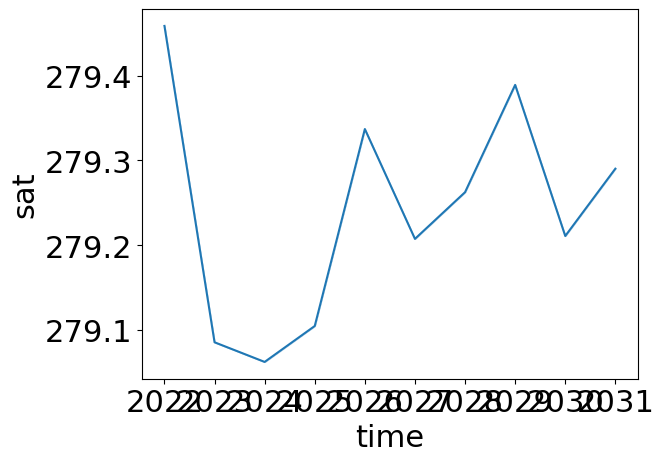

In [85]:
sns.lineplot(data=df_GSFC2D, x="time", y="sat", errorbar='sd')

<Axes: xlabel='time', ylabel='sat'>

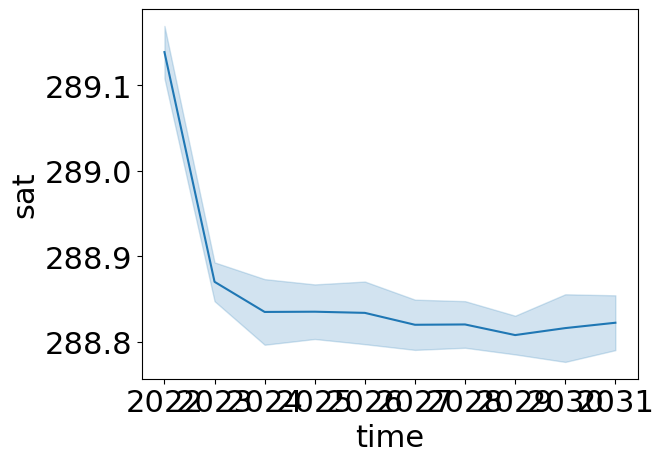

In [86]:
sns.lineplot(data=df_waccm, x="time", y="sat", errorbar='sd')

Text(0, 0.5, 'SAT [K]')

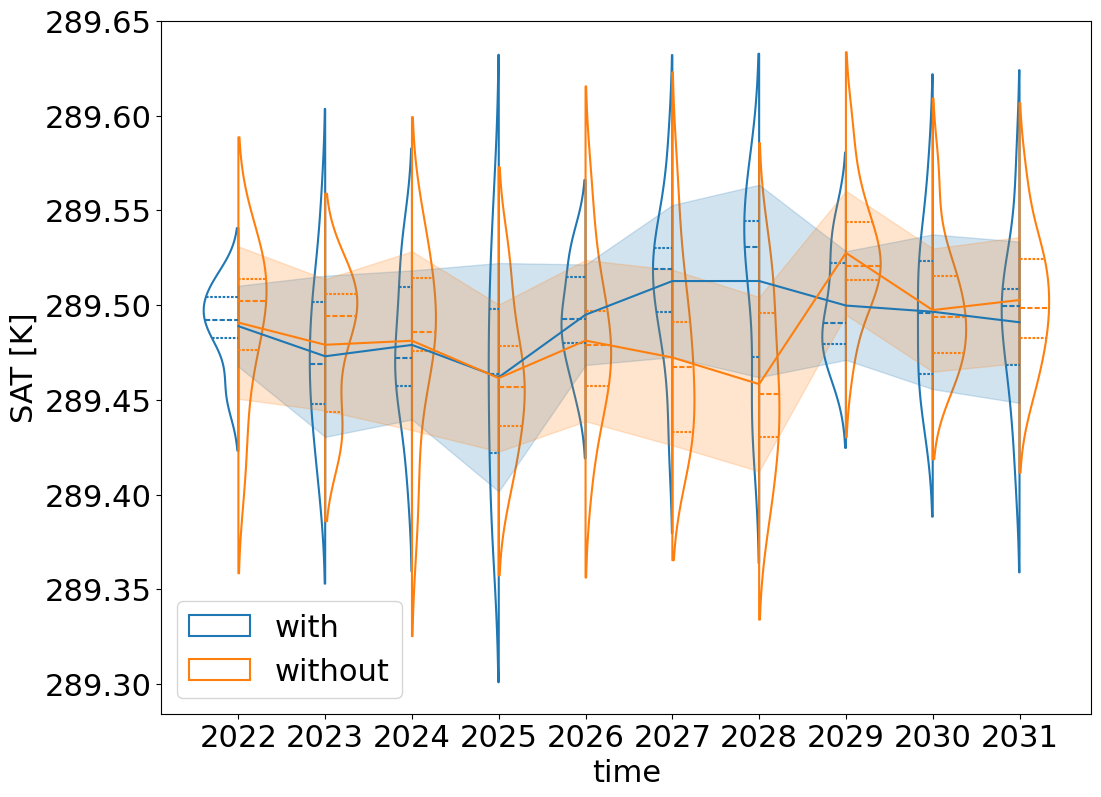

In [87]:
fig, ax = plt.subplots(figsize= (12,9))
sns.violinplot(data=df_miroc_all, x="time", y="sat", hue="what", split=True, inner="quart", ax = ax, fill = False)
sns.lineplot(data=df_miroc, x="time", y="sat", errorbar='sd', ax = ax)
sns.lineplot(data=df_miroc_wo, x="time", y="sat", errorbar='sd', ax = ax)
ax.set_ylabel('SAT [K]')

Text(0, 0.5, 'SAT [K]')

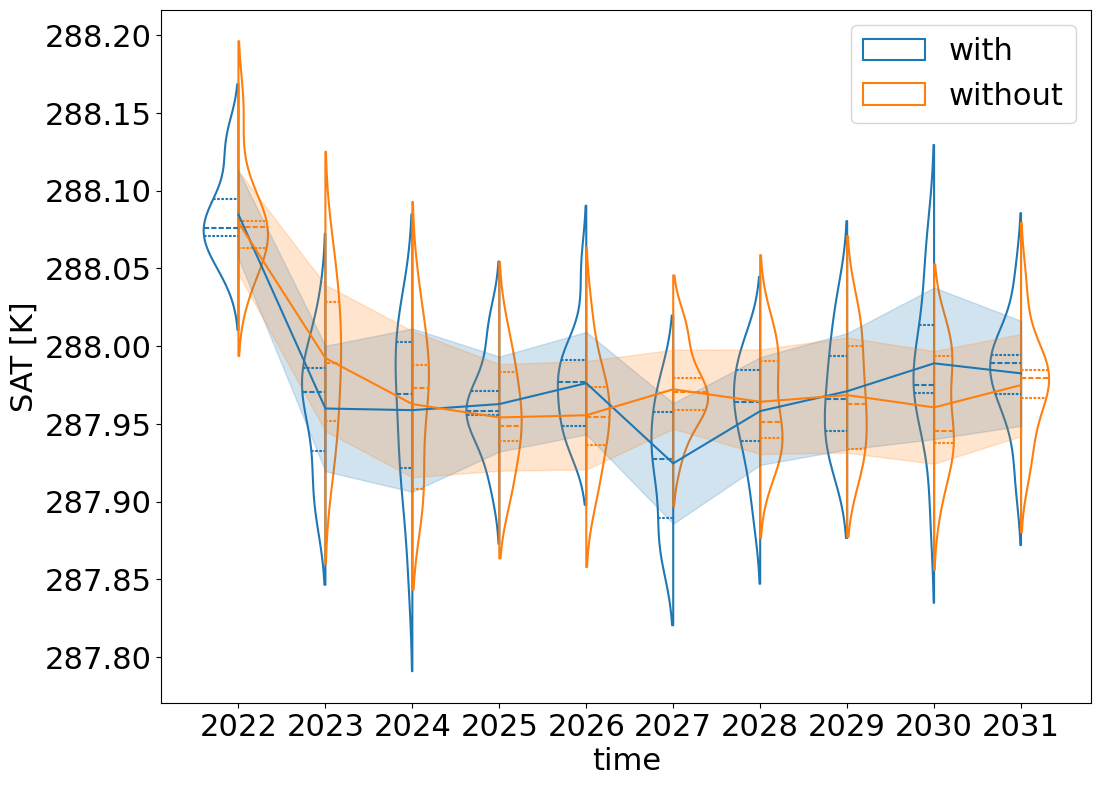

In [88]:
fig, ax = plt.subplots(figsize= (12,9))
sns.violinplot(data=df_cmam_all, x="time", y="sat", hue="what", split=True, inner="quart", ax = ax, fill = False)
sns.lineplot(data=df_cmam, x="time", y="sat", errorbar='sd', ax = ax)
sns.lineplot(data=df_cmam_wo, x="time", y="sat", errorbar='sd', ax = ax)
ax.set_ylabel('SAT [K]')

Text(0, 0.5, 'SAT [K]')

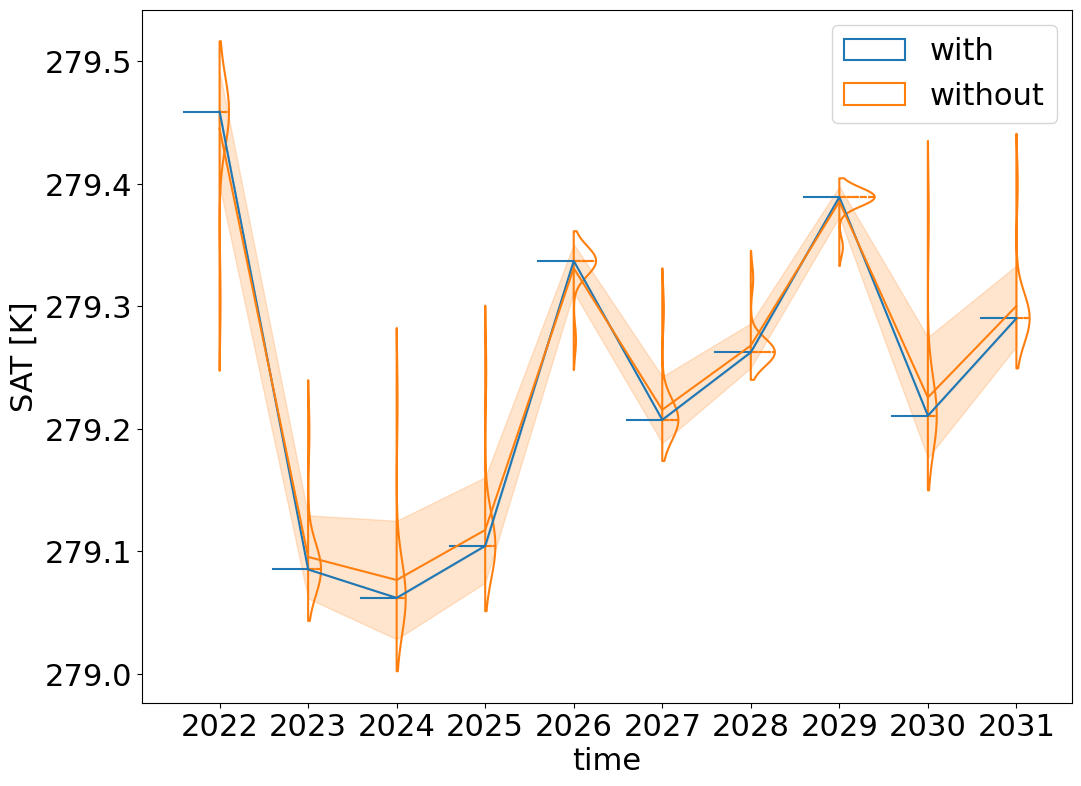

In [89]:
fig, ax = plt.subplots(figsize= (12,9))
sns.violinplot(data=df_GSFC2D_all, x="time", y="sat", hue="what", split=True, inner="quart", ax = ax, fill = False)
sns.lineplot(data=df_GSFC2D, x="time", y="sat", errorbar='sd', ax = ax)
sns.lineplot(data=df_GSFC2D_wo, x="time", y="sat", errorbar='sd', ax = ax)
ax.set_ylabel('SAT [K]')

Text(0, 0.5, 'SAT [K]')

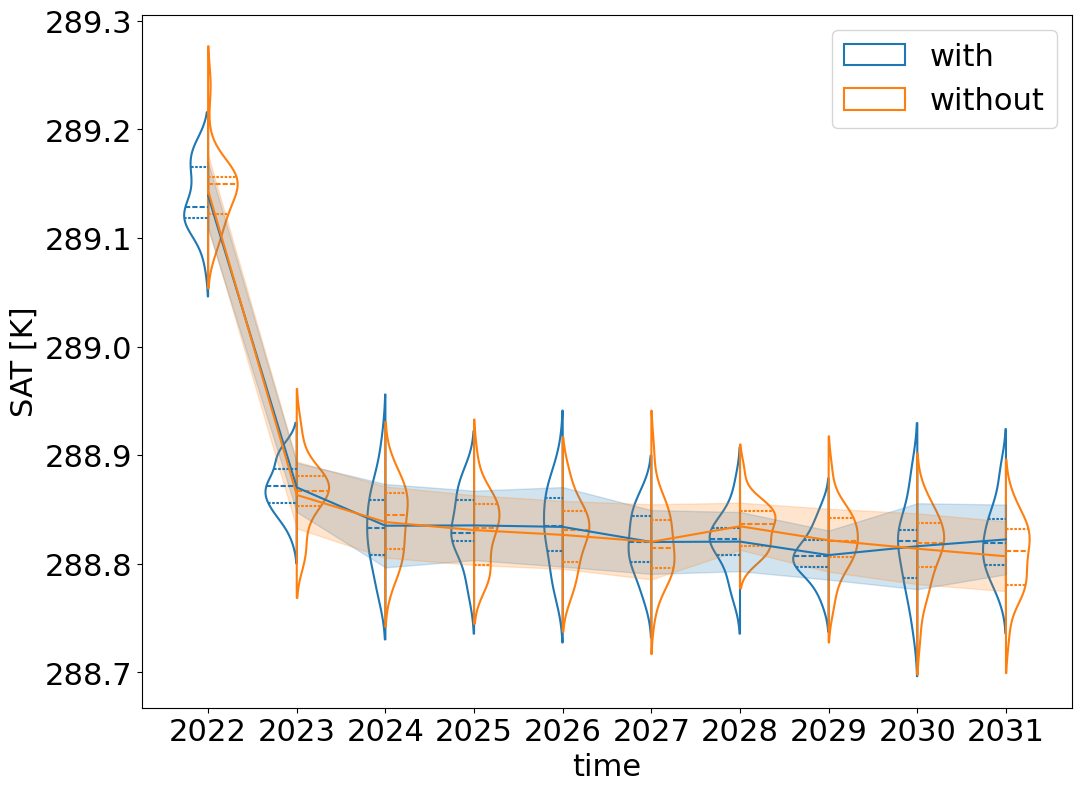

In [90]:
fig, ax = plt.subplots(figsize= (12,9))
sns.violinplot(data=df_waccm_all, x="time", y="sat", hue="what", split=True, inner="quart", ax = ax, fill = False)
sns.lineplot(data=df_waccm, x="time", y="sat", errorbar='sd', ax = ax)
sns.lineplot(data=df_waccm_wo, x="time", y="sat", errorbar='sd', ax = ax)
ax.set_ylabel('SAT [K]')

<Axes: xlabel='time', ylabel='sat'>

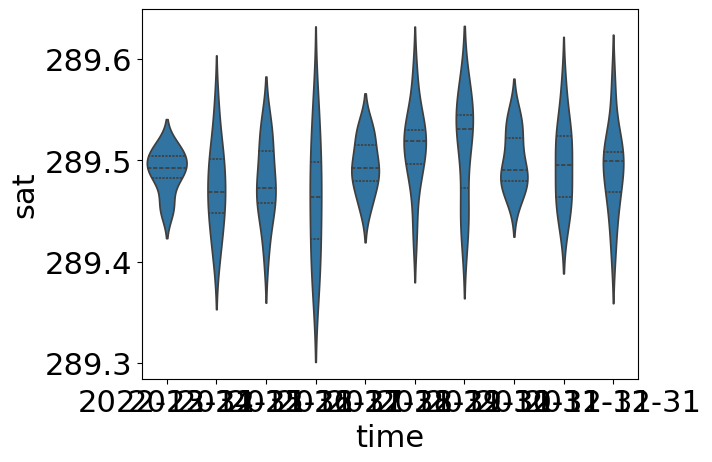

In [91]:
df_miroc  = miroc_w_sat_sel_gm.to_dataframe().reset_index()
sns.violinplot(data=df_miroc, x="time", y="sat", inner="quart")

<Axes: xlabel='time', ylabel='sat'>

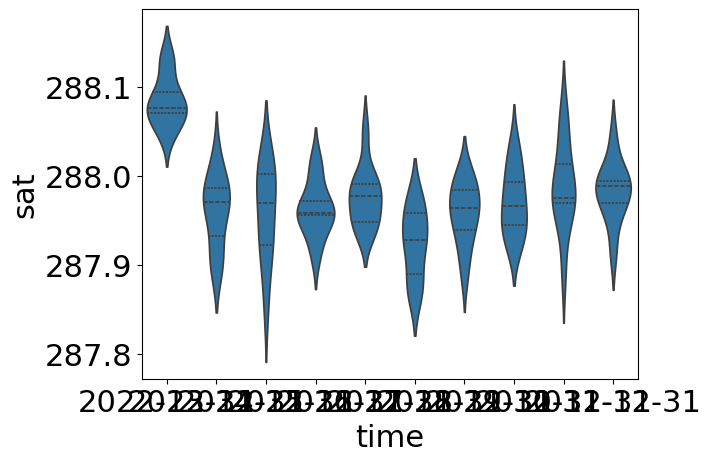

In [92]:
df_cmam  = cmam_w_sat_sel_gm.to_dataframe().reset_index()
sns.violinplot(data=df_cmam, x="time", y="sat", inner="quart")

<Axes: xlabel='time', ylabel='sat'>

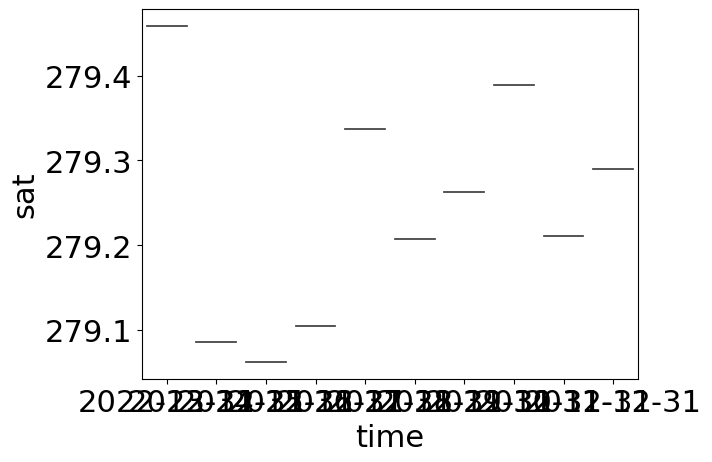

In [93]:
df_GSFC2D  = GSFC2D_w_sat_sel_gm.to_dataframe().reset_index()
sns.violinplot(data=df_GSFC2D, x="time", y="sat", inner="quart")

<Axes: xlabel='time', ylabel='sat'>

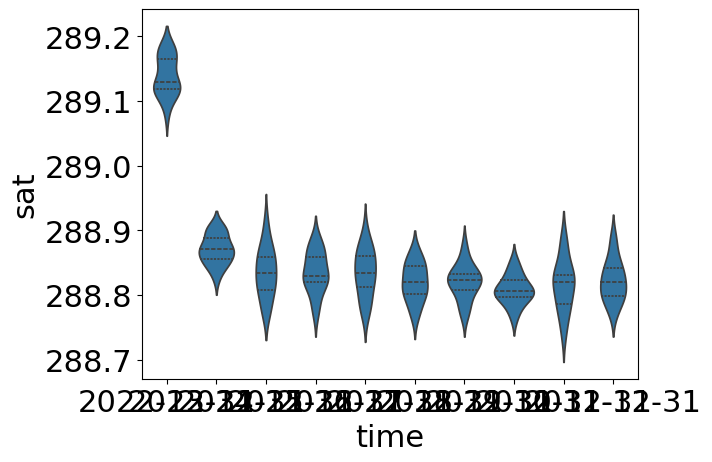

In [94]:
df_waccm  = waccm_w_sat_sel_gm.to_dataframe().reset_index()
sns.violinplot(data=df_waccm, x="time", y="sat", inner="quart")

In [95]:
spike_with = miroc_w_sat_sel_gm.diff('time')
spike_wo = miroc_wo_sat_sel_gm.diff('time')

(array([3.5775676 , 1.53324326, 5.62189195, 6.64405412, 7.1551352 ,
        7.1551352 , 7.1551352 , 2.55540543, 2.04432434, 1.02216217]),
 array([-0.10862854, -0.08613846, -0.06364839, -0.04115831, -0.01866823,
         0.00382184,  0.02631192,  0.048802  ,  0.07129207,  0.09378215,
         0.11627223]),
 <BarContainer object of 10 artists>)

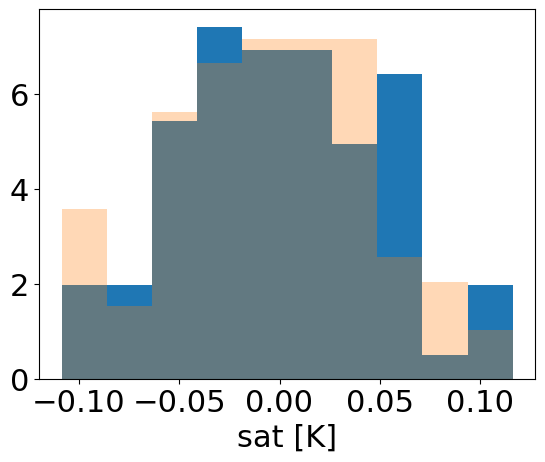

In [96]:
bins = spike_with_miroc.plot.hist(density = True)
spike_wo_miroc.plot.hist(bins = bins[1], alpha = 0.3, density = True)

(array([0.        , 0.35743132, 0.35743132, 1.07229396, 2.85945055,
        6.79119506, 8.93578298, 5.00403847, 2.85945055, 0.71486264]),
 array([-0.23089173, -0.19635173, -0.16181172, -0.12727172, -0.09273172,
        -0.05819171, -0.02365171,  0.01088829,  0.0454283 ,  0.0799683 ,
         0.1145083 ]),
 <BarContainer object of 10 artists>)

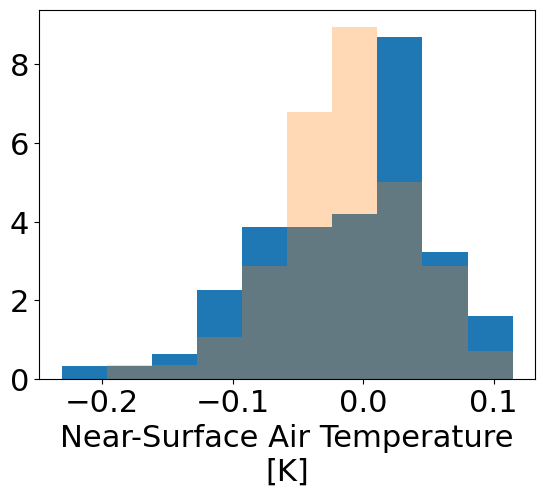

In [97]:
bins = spike_with_cmam.plot.hist(density = True)
spike_wo_cmam.plot.hist(bins = bins[1], alpha = 0.3, density = True)

(array([1.66644782, 0.        , 0.        , 1.66644823, 1.8330926 ,
        1.66644798, 2.99960636, 3.33289585, 1.66644823, 1.66644782]),
 array([-0.37356567, -0.31295165, -0.25233763, -0.19172363, -0.13110963,
        -0.07049561, -0.00988159,  0.05073242,  0.11134644,  0.17196044,
         0.23257446]),
 <BarContainer object of 10 artists>)

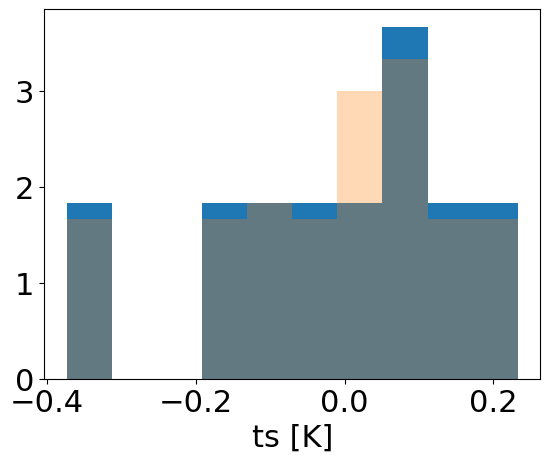

In [98]:
bins = spike_with_GSFC2D.plot.hist(density = True)
spike_wo_GSFC2D.plot.hist(bins = bins[1], alpha = 0.3, density = True)

(array([0.38246452, 1.27488172, 0.50995269, 0.12748817, 0.        ,
        1.27488172, 4.20710968, 9.05166023, 4.46208603, 1.27488172]),
 array([-0.34124838, -0.29693276, -0.25261714, -0.20830151, -0.16398589,
        -0.11967027, -0.07535465, -0.03103903,  0.01327659,  0.05759221,
         0.10190783]),
 <BarContainer object of 10 artists>)

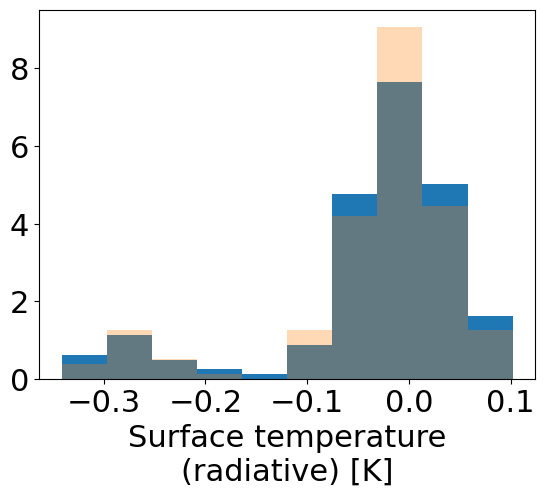

In [99]:
bins = spike_with_waccm.plot.hist(density = True)
spike_wo_waccm.plot.hist(bins = bins[1], alpha = 0.3, density = True)

In [100]:
df_miroc = (spike_with).to_dataframe().reset_index()
df_miroc['time'] = df_miroc.time.dt.strftime('%Y')
df_miroc['what'] = df_miroc.shape[0]*['with']
df_miroc_wo = (spike_wo).to_dataframe().reset_index()
df_miroc_wo['what'] = df_miroc_wo.shape[0]*['without']
df_miroc_wo['time'] = df_miroc_wo.time.dt.strftime('%Y')
df_miroc_all = pd.concat([df_miroc, df_miroc_wo])
df_miroc_all

ens  time       sat     what
0     1  2023 -0.030145     with
1     1  2024  0.057625     with
2     1  2025 -0.016394     with
3     1  2026  0.020729     with
4     1  2027  0.006273     with
..  ...   ...       ...      ...
85   10  2027  0.016760  without
86   10  2028  0.037311  without
87   10  2029  0.044189  without
88   10  2030 -0.097343  without
89   10  2031  0.044279  without

[180 rows x 4 columns]

In [101]:
df_cmam = (spike_with).to_dataframe().reset_index()
df_cmam['time'] = df_cmam.time.dt.strftime('%Y')
df_cmam['what'] = df_cmam.shape[0]*['with']
df_cmam_wo = (spike_wo).to_dataframe().reset_index()
df_cmam_wo['what'] = df_cmam_wo.shape[0]*['without']
df_cmam_wo['time'] = df_cmam_wo.time.dt.strftime('%Y')
df_cmam_all = pd.concat([df_cmam, df_cmam_wo])
df_cmam_all

ens  time       sat     what
0     1  2023 -0.030145     with
1     1  2024  0.057625     with
2     1  2025 -0.016394     with
3     1  2026  0.020729     with
4     1  2027  0.006273     with
..  ...   ...       ...      ...
85   10  2027  0.016760  without
86   10  2028  0.037311  without
87   10  2029  0.044189  without
88   10  2030 -0.097343  without
89   10  2031  0.044279  without

[180 rows x 4 columns]

In [102]:
df_GSFC2D = (spike_with).to_dataframe().reset_index()
df_GSFC2D['time'] = df_GSFC2D.time.dt.strftime('%Y')
df_GSFC2D['what'] = df_GSFC2D.shape[0]*['with']
df_GSFC2D_wo = (spike_wo).to_dataframe().reset_index()
df_GSFC2D_wo['what'] = df_GSFC2D_wo.shape[0]*['without']
df_GSFC2D_wo['time'] = df_GSFC2D_wo.time.dt.strftime('%Y')
df_GSFC2D_all = pd.concat([df_GSFC2D, df_GSFC2D_wo])
df_GSFC2D_all

ens  time       sat     what
0     1  2023 -0.030145     with
1     1  2024  0.057625     with
2     1  2025 -0.016394     with
3     1  2026  0.020729     with
4     1  2027  0.006273     with
..  ...   ...       ...      ...
85   10  2027  0.016760  without
86   10  2028  0.037311  without
87   10  2029  0.044189  without
88   10  2030 -0.097343  without
89   10  2031  0.044279  without

[180 rows x 4 columns]

In [103]:
df_waccm = (spike_with).to_dataframe().reset_index()
df_waccm['time'] = df_waccm.time.dt.strftime('%Y')
df_waccm['what'] = df_waccm.shape[0]*['with']
df_waccm_wo = (spike_wo).to_dataframe().reset_index()
df_waccm_wo['what'] = df_waccm_wo.shape[0]*['without']
df_waccm_wo['time'] = df_waccm_wo.time.dt.strftime('%Y')
df_waccm_all = pd.concat([df_waccm, df_waccm_wo])
df_waccm_all

ens  time       sat     what
0     1  2023 -0.030145     with
1     1  2024  0.057625     with
2     1  2025 -0.016394     with
3     1  2026  0.020729     with
4     1  2027  0.006273     with
..  ...   ...       ...      ...
85   10  2027  0.016760  without
86   10  2028  0.037311  without
87   10  2029  0.044189  without
88   10  2030 -0.097343  without
89   10  2031  0.044279  without

[180 rows x 4 columns]

Text(0, 0.5, 'interannual changes [K]')

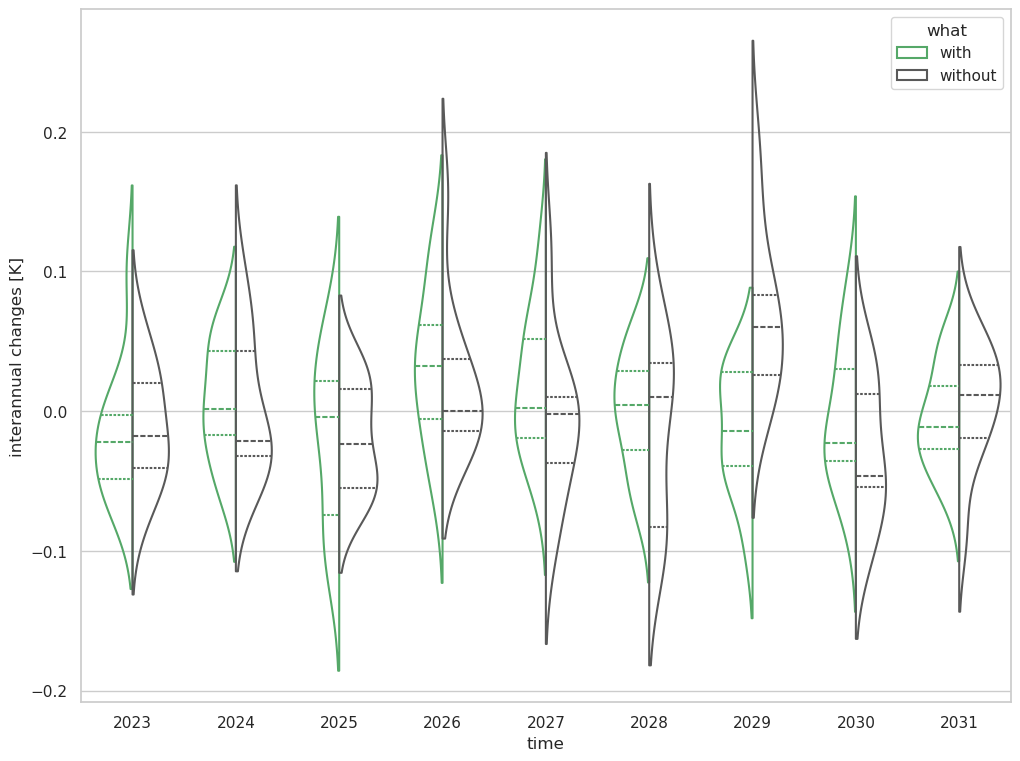

In [104]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (12,9))
sns.violinplot(data=df_miroc_all, x="time", y="sat", hue="what",
               split=True, inner="quart", fill=False,
               palette={"with": "g", "without": ".35"}, ax = ax)
ax.set_ylabel('interannual changes [K]')

Text(0, 0.5, 'interannual changes [K]')

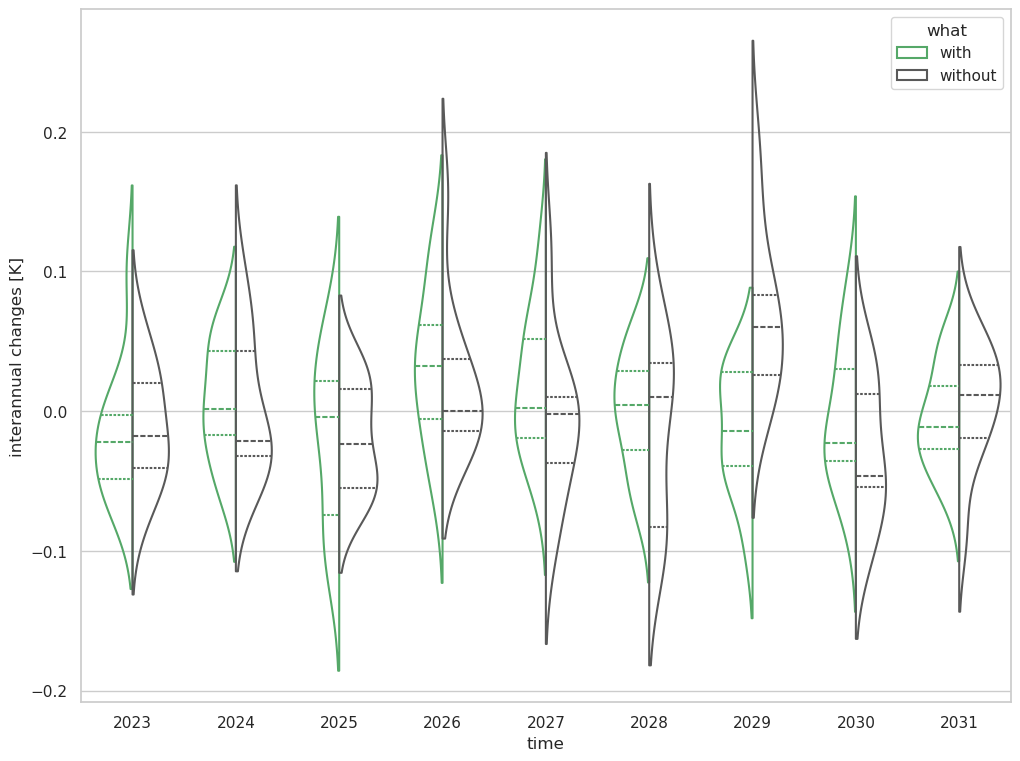

In [105]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (12,9))
sns.violinplot(data=df_cmam_all, x="time", y="sat", hue="what",
               split=True, inner="quart", fill=False,
               palette={"with": "g", "without": ".35"}, ax = ax)
ax.set_ylabel('interannual changes [K]')

Text(0, 0.5, 'interannual changes [K]')

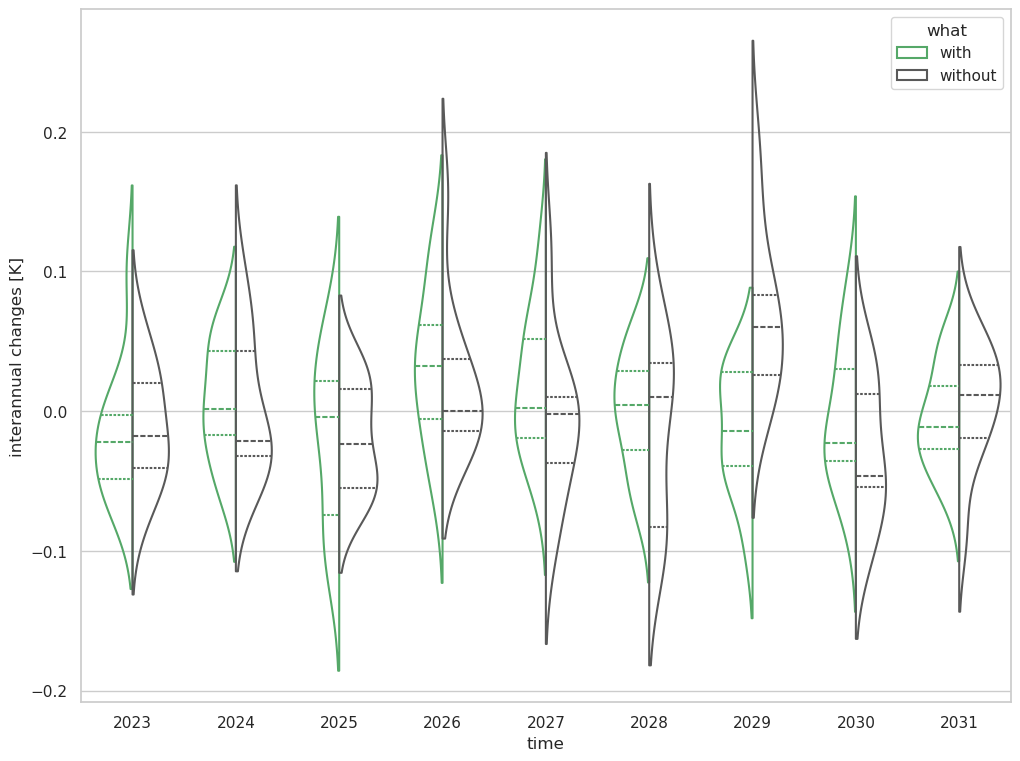

In [106]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (12,9))
sns.violinplot(data=df_GSFC2D_all, x="time", y="sat", hue="what",
               split=True, inner="quart", fill=False,
               palette={"with": "g", "without": ".35"}, ax = ax)
ax.set_ylabel('interannual changes [K]')

Text(0, 0.5, 'interannual changes [K]')

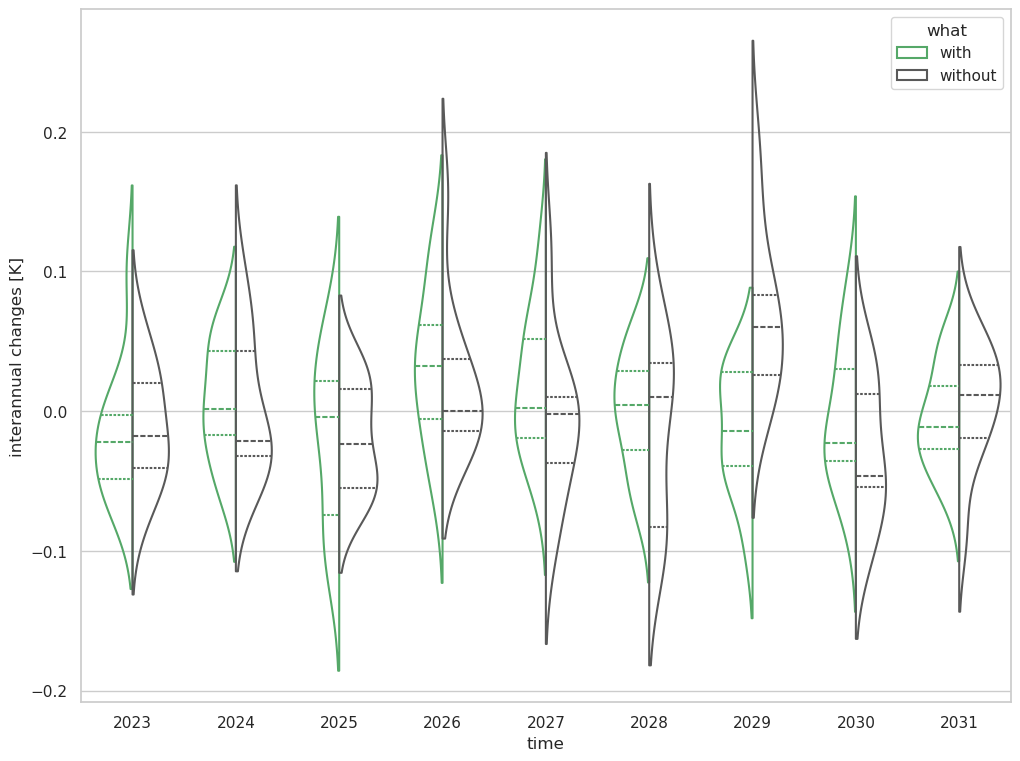

In [107]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (12,9))
sns.violinplot(data=df_waccm_all, x="time", y="sat", hue="what",
               split=True, inner="quart", fill=False,
               palette={"with": "g", "without": ".35"}, ax = ax)
ax.set_ylabel('interannual changes [K]')

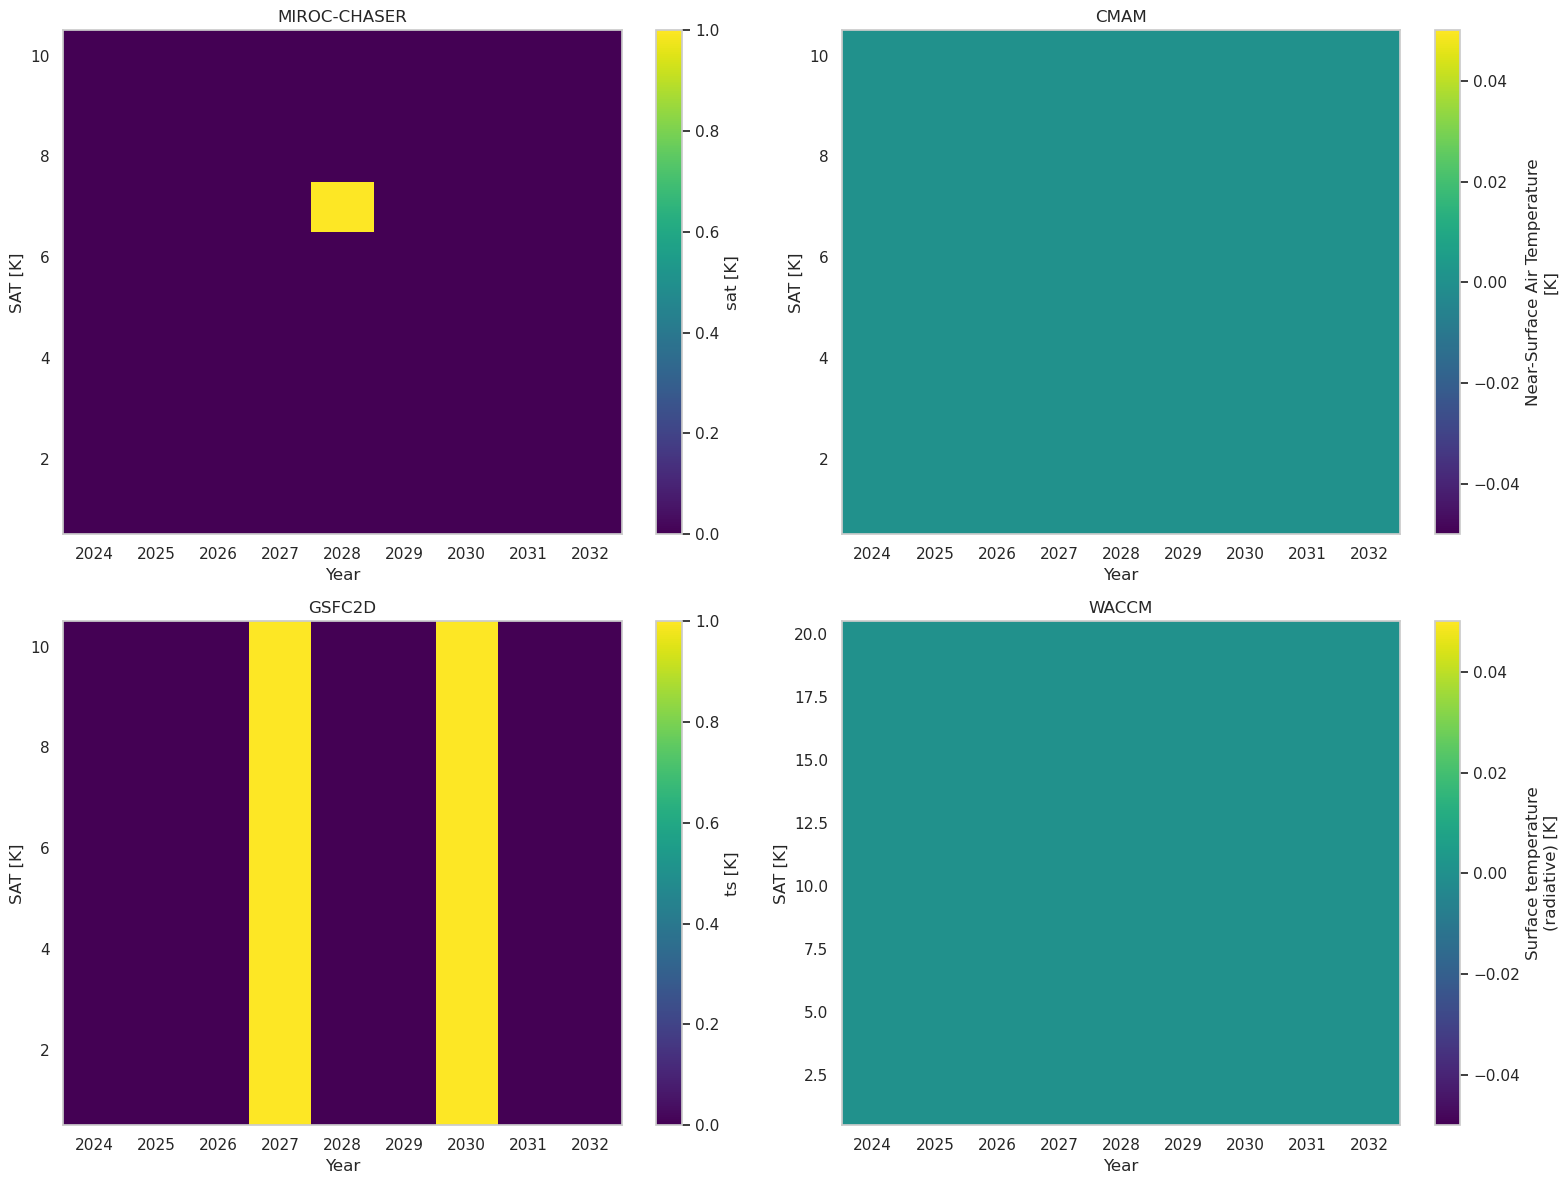

In [108]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# MIROC-CHASER
(spike_with_miroc >= 0.115).plot(x='time', ax=axs[0, 0])
axs[0, 0].set_title("MIROC-CHASER")
axs[0, 0].set_xlabel("Year")
axs[0, 0].set_ylabel("SAT [K]")

# CMAM
(spike_with_cmam >= 0.115).plot(x='time', ax=axs[0, 1])
axs[0, 1].set_title("CMAM")
axs[0, 1].set_xlabel("Year")
axs[0, 1].set_ylabel("SAT [K]")

# GSFC2D
(spike_with_GSFC2D >= 0.115).plot(x='time', ax=axs[1, 0])
axs[1, 0].set_title("GSFC2D")
axs[1, 0].set_xlabel("Year")
axs[1, 0].set_ylabel("SAT [K]")

# WACCM
(spike_with_waccm >= 0.115).plot(x='time', ax=axs[1, 1])
axs[1, 1].set_title("WACCM")
axs[1, 1].set_xlabel("Year")
axs[1, 1].set_ylabel("SAT [K]")

# Adjust layout
plt.tight_layout()
plt.show()

In [109]:
sel_dict = dict(time = slice('2022-01','2031-12'))
miroc_w_sel = miroc_w.sat.sel(**sel_dict)
miroc_wo_sel = miroc_wo.sat.sel(**sel_dict)
waccm_w_sel = waccm_w.sat.sel(**sel_dict)
waccm_wo_sel = waccm_wo.sat.sel(**sel_dict)
cmam_w_sel = cmam_w.sat.sel(**sel_dict)
cmam_wo_sel = cmam_wo.sat.sel(**sel_dict)
GSFC2D_w_sel = GSFC2D_w_H2O.sat.sel(**sel_dict)
GSFC2D_wo_sel = GSFC2D_wo.sat.sel(**sel_dict)

weights_miroc = np.cos(np.deg2rad(miroc_w_sat_sel.lat))
weights_cmam = np.cos(np.deg2rad(cmam_w_sat_sel.lat))
weights_waccm = np.cos(np.deg2rad(waccm_w_sat_sel.lat))
weights_miroc.name = "weights"
weights_cmam.name = "weights"
weights_waccm.name = "weights"



miroc_w_sel_gm = miroc_w_sel.weighted(weights_miroc).mean(['lat','lon']).load()
miroc_wo_sel_gm = miroc_wo_sel.weighted(weights_miroc).mean(['lat','lon']).load()
cmam_w_sel_gm = cmam_w_sel.weighted(weights_cmam).mean(['lat','lon']).load()
cmam_wo_sel_gm = cmam_wo_sel.weighted(weights_cmam).mean(['lat','lon']).load()
waccm_w_sel_gm = waccm_w_sel.weighted(weights_waccm).mean(['lat','lon']).load()
waccm_wo_sel_gm = waccm_wo_sel.weighted(weights_waccm).mean(['lat','lon']).load()
GSFC2D_w_sel_gm = GSFC2D_w_sel.mean("lat").load()
GSFC2D_wo_sel_gm = GSFC2D_wo_sel.mean("lat").load()

In [110]:
cmam_w_sel_gm

<xarray.DataArray 'sat' (ens: 10, time: 119)> Size: 10kB
array([[286.20096798, 286.25358907, 286.78940012, ..., 288.85744837,
        288.12488233, 287.224669  ],
       [286.155681  , 286.34903697, 287.03045528, ..., 289.07504057,
        288.14240359, 287.24959705],
       [286.23989918, 286.45731233, 286.94660459, ..., 288.93698619,
        288.23284128, 287.21737101],
       ...,
       [286.23502333, 286.02554594, 286.94452541, ..., 288.97332136,
        288.13103271, 287.34877349],
       [286.2477606 , 286.1899326 , 286.90665307, ..., 288.92191165,
        288.26983895, 287.22664452],
       [286.13323045, 286.27203343, 286.73805619, ..., 288.99303349,
        288.20895812, 287.37706382]])
Coordinates:
  * time     (time) datetime64[ns] 952B 2022-02-28 2022-03-31 ... 2031-12-31
  * ens      (ens) int64 80B 1 2 3 4 5 6 7 8 9 10
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually 2 metres) air temperature
    units:          K
    original_name:  ST
    history:        degctok 2024-09-16T20:50:32Z altered by CMOR: Reordered d...
    cell_methods:   area: time: mean
    cell_measures:  area: areacella

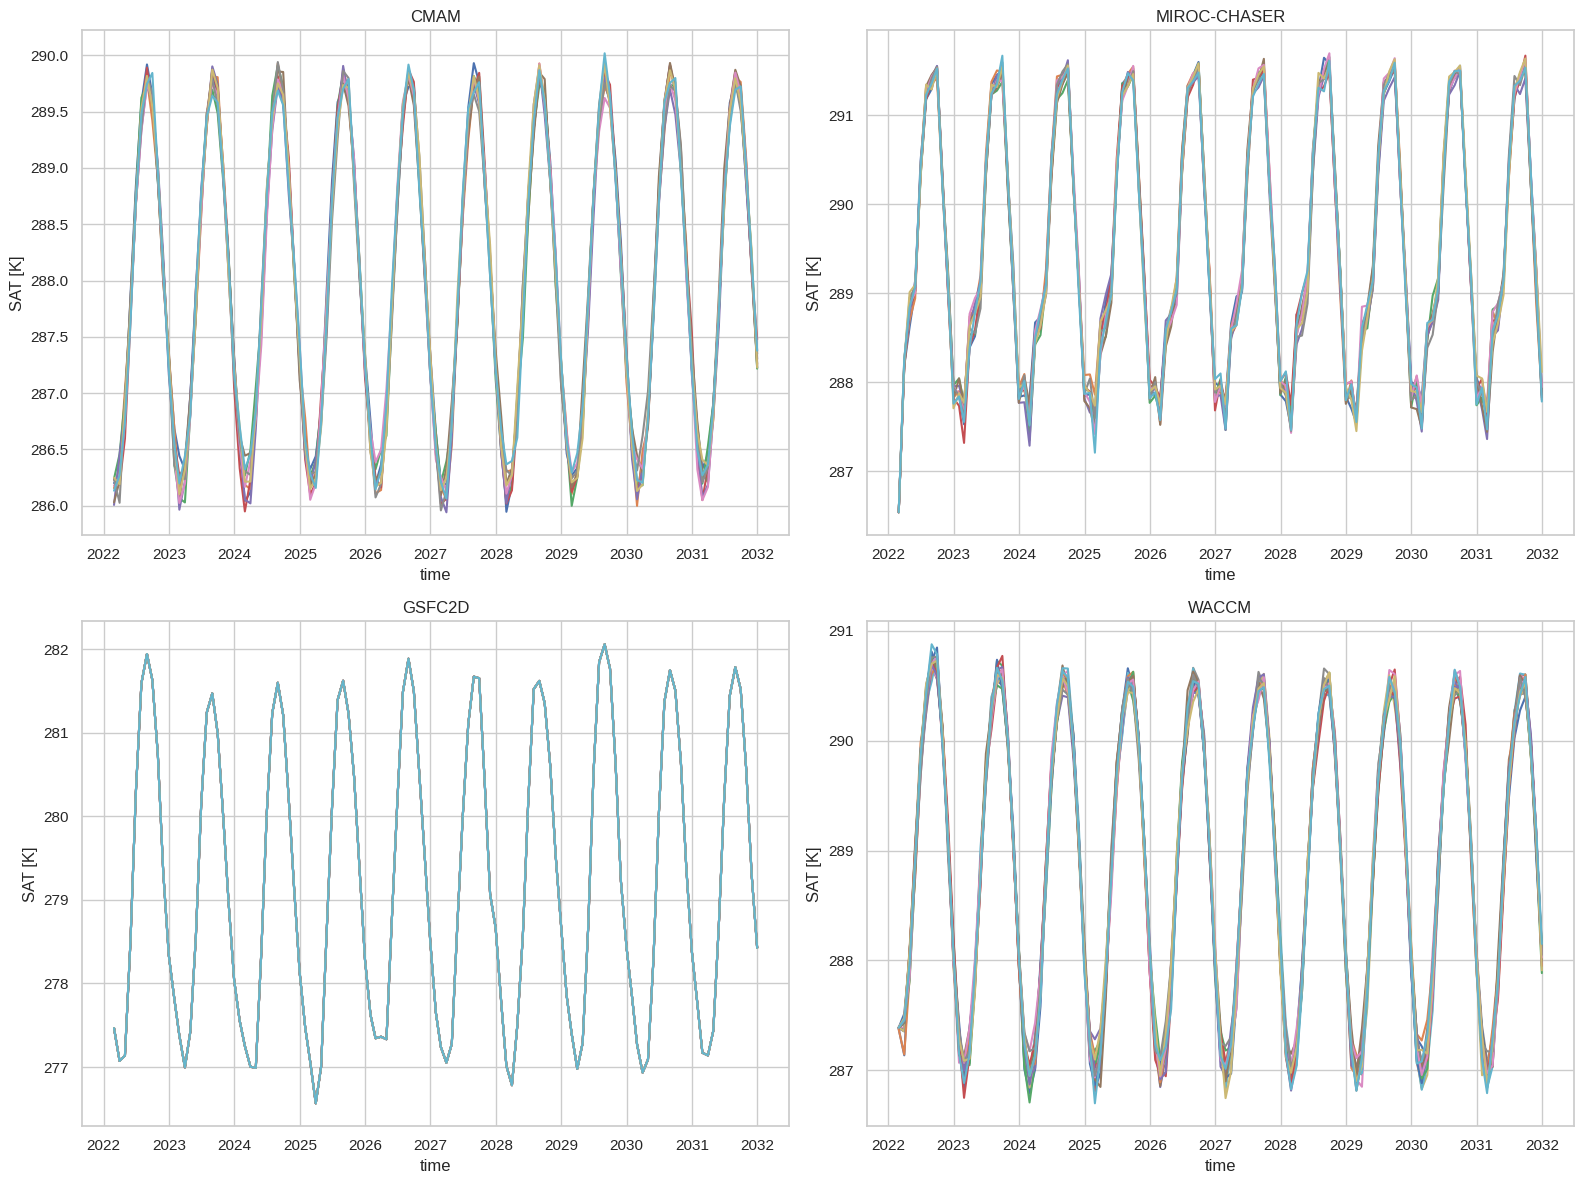

In [111]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
plt.style.use("seaborn-v0_8-dark")
plt.rcParams["figure.figsize"] = (20, 8)

# create plots
cmam_w_sel_gm.plot(hue="ens", ax=axs[0, 0], add_legend=False)
axs[0, 0].set_title("CMAM")
axs[0, 0].set_ylabel("SAT [K]")

miroc_w_sel_gm.plot(hue="ens", ax=axs[0, 1], add_legend=False)
axs[0, 1].set_title("MIROC-CHASER")
axs[0, 1].set_ylabel("SAT [K]")

GSFC2D_w_sel_gm.plot(hue="ens", ax=axs[1, 0], add_legend=False)
axs[1, 0].set_title("GSFC2D")
axs[1, 0].set_ylabel("SAT [K]")

waccm_w_sel_gm.plot(hue="ens", ax=axs[1, 1], add_legend=False)
axs[1, 1].set_title("WACCM")
axs[1, 1].set_ylabel("SAT [K]")

plt.tight_layout()
plt.show()

In [112]:
miroc_mean = miroc_w_sel_gm.mean("ens")
cmam_mean = cmam_w_sel_gm.mean("ens")
waccm_mean = waccm_w_sel_gm.mean("ens")
GSFC2D_mean = GSFC2D_w_sel_gm.mean("ens")

datasets = [miroc_mean, cmam_mean, GSFC2D_mean, waccm_mean]

#xr.concat(datasets, 

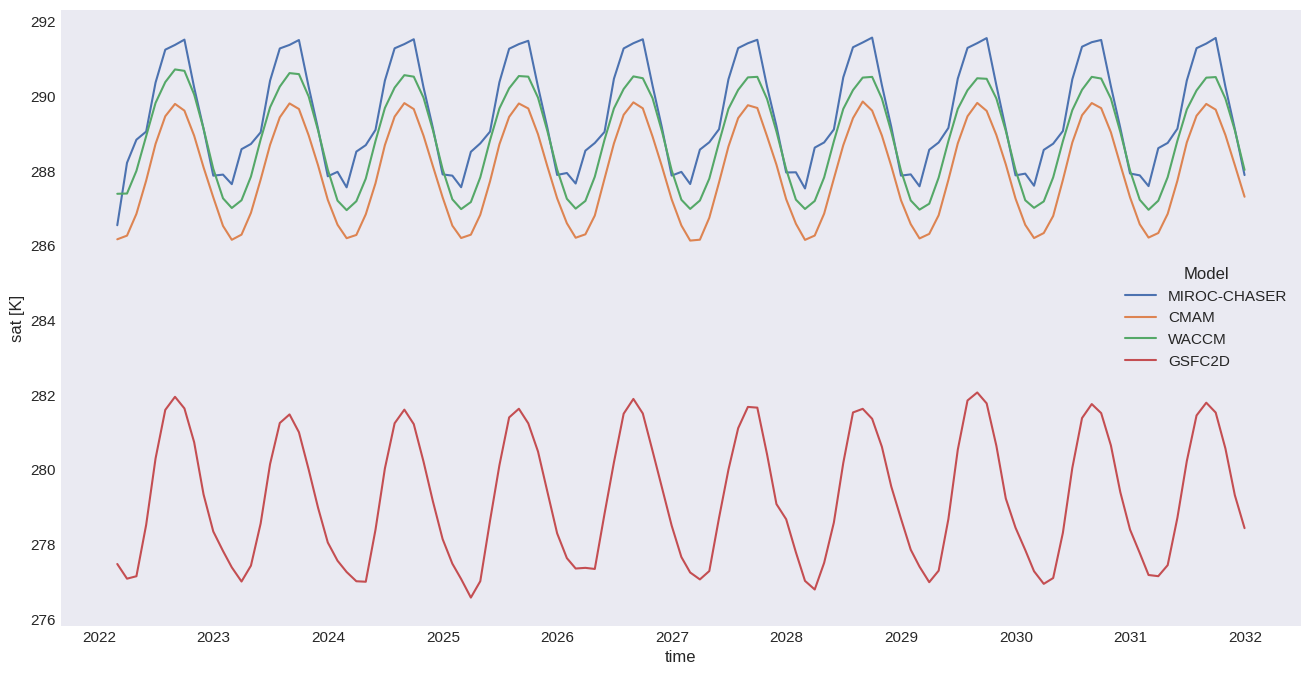

In [113]:
# Create a list of datasets
datasets = [miroc_mean, cmam_mean, waccm_mean, GSFC2D_mean]
model_names = ["MIROC-CHASER", "CMAM", "WACCM", "GSFC2D"]

# Concatenate along the "model" dimension
model_combined = xr.concat(datasets, dim=xr.DataArray(model_names, dims="Model", name="Model"))

plt.style.use("seaborn-v0_8-dark")
plt.rcParams["figure.figsize"] = (16, 8)
model_combined.plot(hue="Model")
plt.show()

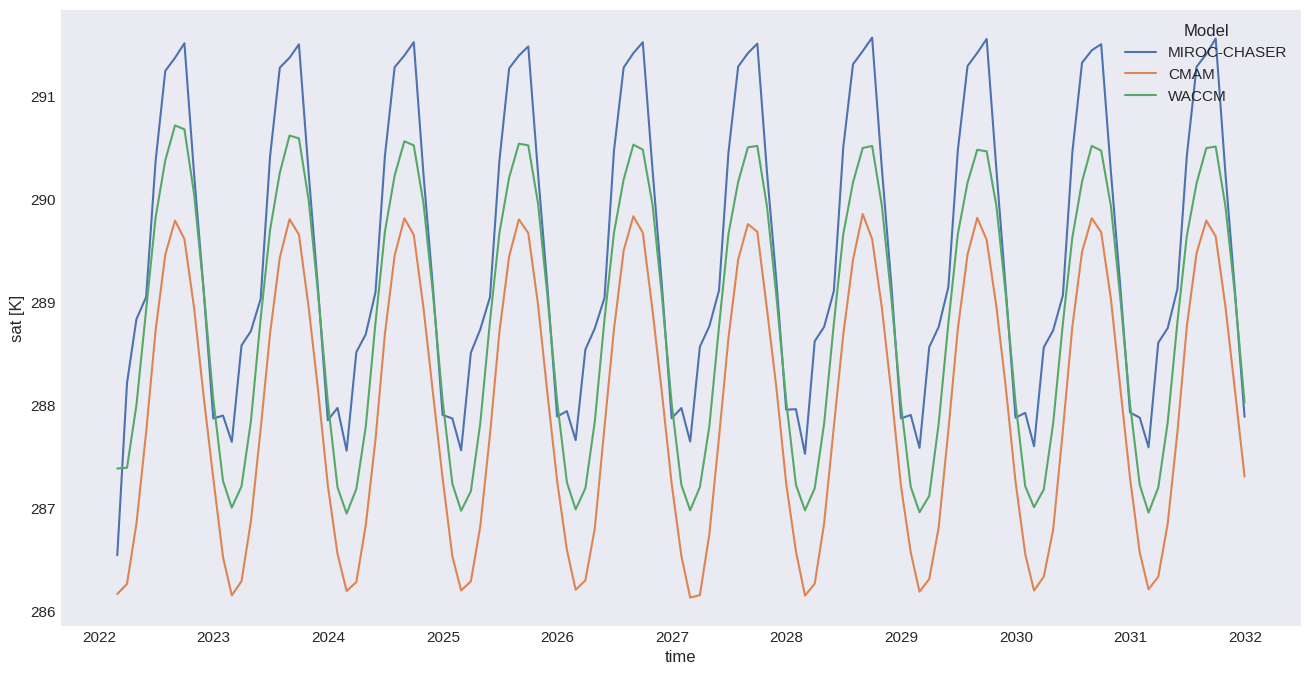

In [117]:
# Create a list of datasets
datasets = [miroc_mean, cmam_mean, waccm_mean]
model_names = ["MIROC-CHASER", "CMAM", "WACCM"]

# Concatenate along the "model" dimension
model_combined = xr.concat(datasets, dim=xr.DataArray(model_names, dims="Model", name="Model"))

plt.style.use("seaborn-v0_8-dark")
plt.rcParams["figure.figsize"] = (16, 8)
model_combined.plot(hue="Model")
plt.show()